
<hr>
<br><br>
    <h1 align=center><font size = 5>Análise de comportamento dos usuários -   
    <br><br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
    Laura Damaceno de Almeida</font></h1>
<br><br>
</h1>

**Hipótese:** 

    - H0: grupos distintos de usuários deveriam receber combinações de temas distintas nesse componente, porque eles têm interesses distintos.
        
    - H1: pode ser que existam grupos com interesse misto e faça sentido ter um mix de tema.

**Objetivo**: realizar uma análise exploratória de dados para entender esses diversos comportamentos de consumo, construir uma segmentação dos usuários que permita que a hipótese levantada seja avaliada e consolidar os resultados encontrados numa apresentação

**Publico-alvo da apresentação:** designers, POs e gerentes de produto na qual você defenderá a implementação da sua solução.


<h4><u> Etapas de execução do notebook</u></h4>

1. [Preparação do ambiente](#1)<br>
1,1 [Importação das bibliotecas](#11)<br>
1,2 [Leitura dos dados](#12)<br>
1,3 [Identificação de valores faltantes](#13)<br>
1,3 [Tratamento dos dados faltantes e valores incorretos](#14)<br><br>

2. [Análise descritiva e diagnóstica](#2)<br>
2,1 [Análise Descritiva](#21)<br>
2,2 [Análise Diagnóstica](#22)<br>
2,3 [Correlação entre as variáveis](#23)<br><br>
3. [Pré-processamento](#3) <br>
3,1 [Escalando os dados](#31)<br>
3,2 [Seleção de variáveis qualitativas](#32)<br><br>

4. [Segmentação de clientes](#4) <br>
4,1 [Teste 1 com variáveis](#41)<br>
4,2 [Teste 2 com variáveis](#42)<br>
4,3 [Teste 3 com variáveis](#43)<br>
4,4 [Teste 4 com variáveis](#44)<br>
4,5 [Conclusão das hipóteses](#45)<br><br>

<hr>

## 1. Preparação do ambiente <a id="1"></a>


<h4>1.1 Importação de bibliotecas:</h4><a id="11"></a>


In [115]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
import scipy.stats as stats


In [6]:
pd.set_option('display.max_columns', None)


<h4>1.2 Leitura de dados:</h4> <a id="12"></a>

In [7]:
df = pd.read_parquet('base_desafio_home.parquet')
df.head()

,userid,pageviews,sessoes,page_sessao,avg_tempo_sessao,perc_sessao_manha,perc_sessao_tarde,perc_sessao_noite,perc_sessao_madrugada,perc_sessao_mobile,perc_sessao_desktop,razao_sessao_g1_home,razao_sessao_ge_home,razao_sessao_gshow_home,retorno_semanal,retorno_mensal,clicks_total,perc_sessoes_click,perc_sessoes_click_video,perc_sessoes_clicou_ao_vivo,perc_sessoes_clicks_1_tema,perc_sessoes_clicks_2_temas,perc_sessoes_clicks_3_mais_temas,perc_sessoes_clicks_1_area,perc_sessoes_clicks_2_areas,perc_sessoes_clicks_3_mais_areas,perc_sessoes_click_sessao_jornalismo,perc_sessoes_click_sessao_esporte,perc_sessoes_click_sessao_entretenimento,perc_sessoes_click_sessao_receitas,perc_sessoes_click_sessao_techtudo,perc_sessoes_click_sessao_globoplay,perc_sessoes_click_sessao_valor,perc_sessoes_click_sessao_autoesporte,perc_sessoes_click_sessao_outros,avg_clicks_por_sessao,avg_clicks_temas_por_sessao,avg_clicks_areas_por_sessao,avg_areas_views_por_sessao,avg_temas_views_por_sessao,avg_views_por_sessao,address_state,idade,gender
0,G_69235,20.0,14.0,1.428571,43.876167,0.222222,0.277778,0.500000,0.000000,1.000000,0.000000,0.071429,NaN,3.928571,3.500000,3.500000,3.0,0.214286,0.00000,0.0,0.214286,0.000000,0.000000,0.214286,0.000000,0.000000,0.071429,0.000000,0.142857,0.0,0.0,0.0,0.0,0.0,0.000000,0.211111,0.211111,0.211111,4.900000,3.533333,24.088889,Bahia,51.0,F
1,G_60891,487.0,376.0,1.295213,28.751184,0.169492,0.277542,0.519068,0.033898,0.991525,0.008475,0.069149,0.702128,0.005319,4.416667,19.272727,75.0,0.188830,0.00266,0.0,0.180851,0.005319,0.002660,0.183511,0.005319,0.000000,0.015957,0.061170,0.005319,0.0,0.0,0.0,0.0,0.0,0.002660,0.234683,0.234683,0.229624,3.390801,2.991759,16.942771,Distrito Federal,47.0,M
2,G_157218,17.0,11.0,1.545455,103.609091,0.545455,0.454545,0.000000,0.000000,0.000000,1.000000,0.363636,NaN,0.454545,2.000000,3.333333,10.0,0.818182,0.00000,0.0,0.818182,0.000000,0.000000,0.727273,0.090909,0.000000,0.181818,0.000000,0.636364,0.0,0.0,0.0,0.0,0.0,0.000000,0.933333,0.833333,0.933333,12.133333,7.533333,85.333333,Rio Grande do Sul,33.0,F
3,G_119135,226.0,136.0,1.661765,62.789542,0.251613,0.296774,0.412903,0.038710,0.890323,0.109677,0.279412,0.411765,0.051471,3.937500,10.500000,97.0,0.522059,0.00000,0.0,0.448529,0.051471,0.022059,0.433824,0.058824,0.029412,0.367647,0.066176,0.117647,0.0,0.0,0.0,0.0,0.0,0.029412,0.637720,0.583101,0.592549,5.167181,3.778755,26.345499,Distrito Federal,37.0,M
4,G_29373,78.0,42.0,1.857143,68.514023,0.186047,0.255814,0.325581,0.232558,1.000000,0.000000,0.595238,0.023810,0.190476,1.705882,3.222222,41.0,0.500000,0.00000,0.0,0.380952,0.119048,0.000000,0.357143,0.142857,0.000000,0.404762,0.047619,0.095238,0.0,0.0,0.0,0.0,0.0,0.000000,1.018301,0.735621,0.645752,5.813399,4.082680,28.657843,São Paulo,34.0,F


In [9]:
df.shape

(161757, 44)

In [10]:
df.userid.nunique()

161757

Tem uma linha por usuário unico

<h4>1.3  Identificação de valores faltantes</h4> <a id="13"></a>

In [11]:

faltantes = pd.DataFrame({'colunas':df.columns, 
                      'tipo':df.dtypes,
                      'Qtde valores NaN':df.isna().sum(),
                      '% valores NaN':df.isna().sum()/df.shape[0],
                      'valores únicos por feature':df.nunique()})
faltantes = faltantes.reset_index()
faltantes[faltantes['Qtde valores NaN']>0]

,index,colunas,tipo,Qtde valores NaN,% valores NaN,valores únicos por feature
4,avg_tempo_sessao,avg_tempo_sessao,float64,20,0.000124,161711
11,razao_sessao_g1_home,razao_sessao_g1_home,float64,2578,0.015937,45629
12,razao_sessao_ge_home,razao_sessao_ge_home,float64,11784,0.072850,57355
13,razao_sessao_gshow_home,razao_sessao_gshow_home,float64,15580,0.096317,37636
41,address_state,address_state,object,7041,0.043528,29
42,idade,idade,float64,3635,0.022472,110
43,gender,gender,object,5474,0.033841,4


poucos valores faltantes, abaixo de 10%.

In [12]:
df.describe()

,pageviews,sessoes,page_sessao,avg_tempo_sessao,perc_sessao_manha,perc_sessao_tarde,perc_sessao_noite,perc_sessao_madrugada,perc_sessao_mobile,perc_sessao_desktop,razao_sessao_g1_home,razao_sessao_ge_home,razao_sessao_gshow_home,retorno_semanal,retorno_mensal,clicks_total,perc_sessoes_click,perc_sessoes_click_video,perc_sessoes_clicou_ao_vivo,perc_sessoes_clicks_1_tema,perc_sessoes_clicks_2_temas,perc_sessoes_clicks_3_mais_temas,perc_sessoes_clicks_1_area,perc_sessoes_clicks_2_areas,perc_sessoes_clicks_3_mais_areas,perc_sessoes_click_sessao_jornalismo,perc_sessoes_click_sessao_esporte,perc_sessoes_click_sessao_entretenimento,perc_sessoes_click_sessao_receitas,perc_sessoes_click_sessao_techtudo,perc_sessoes_click_sessao_globoplay,perc_sessoes_click_sessao_valor,perc_sessoes_click_sessao_autoesporte,perc_sessoes_click_sessao_outros,avg_clicks_por_sessao,avg_clicks_temas_por_sessao,avg_clicks_areas_por_sessao,avg_areas_views_por_sessao,avg_temas_views_por_sessao,avg_views_por_sessao,idade
count,161757.000000,161757.000000,161757.000000,161737.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,159179.000000,149973.000000,146177.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,161757.000000,158122.000000
mean,492.429929,248.319863,1.941362,147.533759,0.285323,0.331531,0.309380,0.073766,0.604673,0.390333,0.400786,0.783076,0.227153,3.912830,12.346253,240.741316,0.556666,0.026418,0.035134,0.394453,0.114801,0.047411,0.401692,0.112309,0.042665,0.241732,0.155123,0.180624,0.000798,0.004772,0.001409,0.000121,0.000033,0.025520,0.999283,0.817289,0.791670,6.605574,4.720919,41.727967,40.578901
std,788.570829,311.759222,1.766150,354.469976,0.143067,0.136412,0.166964,0.086781,0.436689,0.435790,0.655639,1.576499,0.431001,1.430316,6.682428,382.052497,0.224214,0.044892,0.060790,0.165121,0.088229,0.070262,0.165932,0.086739,0.066799,0.173899,0.154460,0.176953,0.005051,0.014386,0.010878,0.001678,0.000670,0.046703,0.691834,0.439129,0.415274,2.099555,1.199808,15.629030,12.771552
min,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001116,0.000701,0.000566,1.000000,3.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.125000,1.000000,1.447619,8.000000
25%,74.000000,45.000000,1.333333,58.807000,0.194861,0.250000,0.211538,0.006780,0.028986,0.000000,0.164384,0.127273,0.043027,2.666667,6.333333,33.000000,0.394004,0.000000,0.000000,0.284075,0.045455,0.000000,0.292350,0.043478,0.000000,0.107143,0.030000,0.048276,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.558033,0.504667,0.494150,5.098798,3.890959,30.631003,32.000000
50%,222.000000,128.000000,1.613333,95.268127,0.272727,0.312757,0.323583,0.048913,0.872570,0.114983,0.276910,0.384615,0.111111,3.882353,11.333333,99.000000,0.575758,0.010989,0.016667,0.389908,0.100000,0.022222,0.397590,0.098276,0.017857,0.207547,0.110874,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008197,0.886932,0.783617,0.763889,6.203679,4.454832,40.133555,38.000000
75%,609.000000,332.000000,2.082192,156.084409,0.357595,0.395349,0.408163,0.107463,1.000000,0.965517,0.444444,0.787582,0.260000,5.100000,17.545455,286.000000,0.732075,0.033333,0.045455,0.491935,0.168269,0.062937,0.500000,0.166667,0.055556,0.343750,0.237548,0.259740,0.000000,0.003300,0.000000,0.000000,0.000000,0.031250,1.260204,1.060809,1.030564,7.796117,5.367063,50.962261,46.000000
max,48554.000000,5209.000000,196.750000,58897.385250,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.510870,51.500000,26.500

75% dos clientes estão abaixo de 46 anos. a mediana é de 38 anos. Todavia tem um outlier de 8 anos e de 2021, seria importante validar com o time de negócios se é algo normal


<h4>1.4  Tratamento dos dados faltantes e valores incorretos</h4> <a id="14"></a>

Como tem poucos dados faltantes e não tenho conhecimento dos especialistas irei remover os dados faltantes, dado que o percentual não representa uma grande quebra



In [13]:
df_limpo = df.dropna()

In [14]:
df_limpo['idade'] = df_limpo['idade'].astype(int)

/var/folders/x9/677608_s3v59vr4xn87k94d40000gn/T/ipykernel_12614/467063833.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['idade'] = df_limpo['idade'].astype(int)


In [15]:
df_limpo['clicks_total'] = df_limpo['clicks_total'].astype(int)

/var/folders/x9/677608_s3v59vr4xn87k94d40000gn/T/ipykernel_12614/3248672512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['clicks_total'] = df_limpo['clicks_total'].astype(int)


In [16]:
df_limpo['pageviews'] = df_limpo['pageviews'].astype(int)

/var/folders/x9/677608_s3v59vr4xn87k94d40000gn/T/ipykernel_12614/1895786329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['pageviews'] = df_limpo['pageviews'].astype(int)


In [17]:
df_limpo['sessoes'] = df_limpo['sessoes'].astype(int)

/var/folders/x9/677608_s3v59vr4xn87k94d40000gn/T/ipykernel_12614/4096793449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpo['sessoes'] = df_limpo['sessoes'].astype(int)


In [18]:
df_limpo['idade'].max()

2021

<Axes: ylabel='idade'>

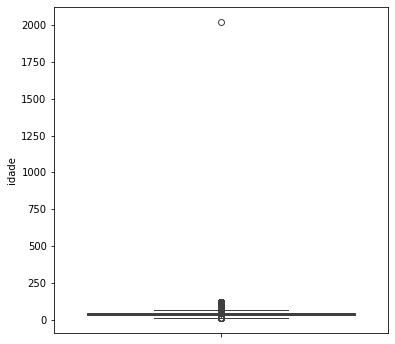

In [19]:
plt.figure(figsize = (6,6))

sns.boxplot(df_limpo['idade'])

In [20]:
df_limpo_filtro_idade = df_limpo[(df_limpo['idade']>= 18)&(df_limpo['idade']< 2021)]

verificando se há mais outliers depois de remover os mais críticos

<Axes: ylabel='idade'>

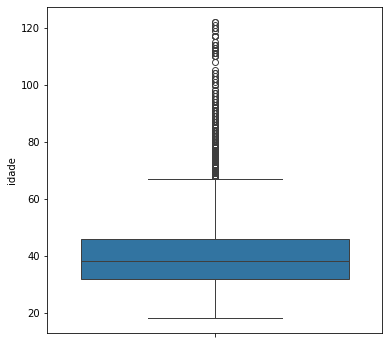

In [21]:
plt.figure(figsize = (6,6))

sns.boxplot(df_limpo_filtro_idade['idade'])

In [22]:
df_limpo_filtro_idade = df_limpo_filtro_idade[df_limpo_filtro_idade['idade']<= 100]

<Axes: ylabel='idade'>

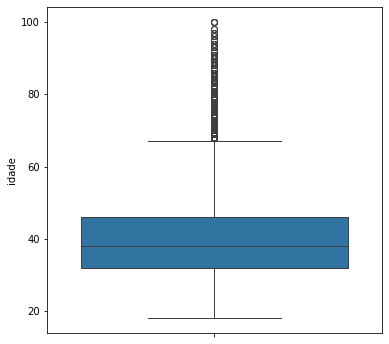

In [23]:
plt.figure(figsize = (6,6))

sns.boxplot(df_limpo_filtro_idade['idade'])

## 2. Análise descritiva e diagnóstica <a id="2"></a>

<h4> 2.1 Análise descritiva</h4><a id="21"></a>

Text(0.5, 1.0, 'Distribuição da visualização')

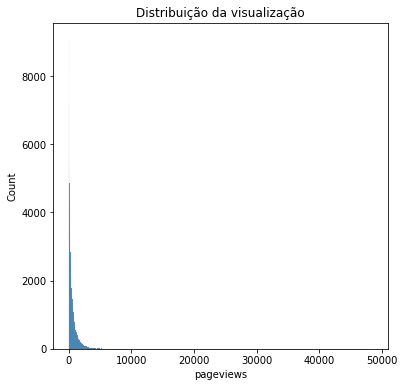

In [24]:
plt.figure(figsize = (6,6))

sns.histplot(df_limpo_filtro_idade['pageviews'])
plt.title('Distribuição da visualização')

In [25]:
df_limpo_filtro_idade['pageviews'].skew()

8.497617135183996

ele está levemento assimétrico à esquerda (justificado pelo valor de Skew). Tendo outliers que puxam a cauda da distribuição. Mas a tendência de pageviews é bem baixa, quase próxima de 0

<Axes: ylabel='pageviews'>

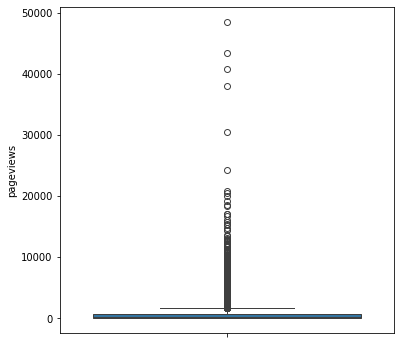

In [26]:
plt.figure(figsize = (6,6))

sns.boxplot(df_limpo_filtro_idade['pageviews'])

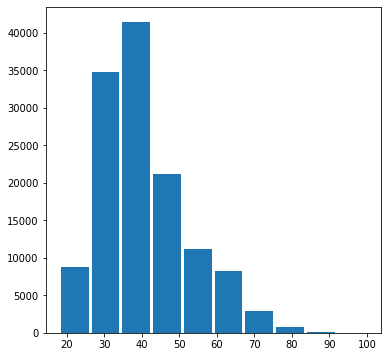

In [27]:
plt.figure(figsize = (6,6))

#sns.countplot(df_limpo_filtro_idade['idade'])
#plt.title('Distribuição da idade dos clientes')
plt.hist(df_limpo_filtro_idade['idade'],rwidth=0.9)
plt.show()

Concentração maior de pessoas entre 30 e 40 anos

Text(0.5, 1.0, 'Estados')

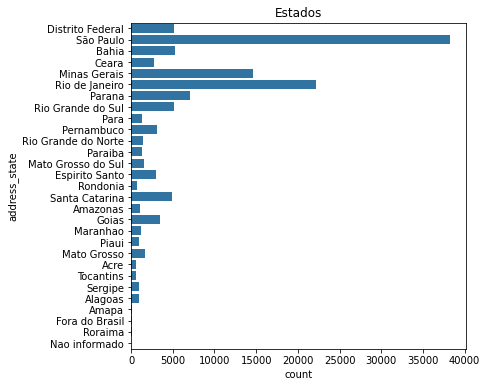

In [28]:
plt.figure(figsize = (6,6))

sns.countplot(df_limpo_filtro_idade['address_state'])
plt.title('Estados')

Maioria dos clientes são de São Paulo, Rio de Janeiro e Minas Gerais

Text(0.5, 1.0, 'Gênero dos clientes')

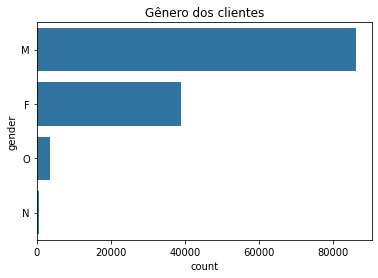

In [29]:
sns.countplot(df_limpo_filtro_idade['gender'])
plt.title('Gênero dos clientes')

Maioria é masculino seguido por mulheres

Text(0.5, 1.0, 'Distribuição da visualização')

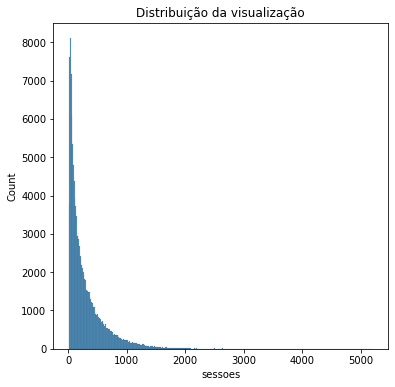

In [30]:
plt.figure(figsize = (6,6))

sns.histplot(df_limpo_filtro_idade['sessoes'])
plt.title('Distribuição da visualização')

In [31]:
df_limpo_filtro_idade['sessoes'].skew()

2.3283679214181654

ele está levemento assimétrico à esquerda (justificado pelo valor de Skew). Tendo outliers que puxam a cauda da distribuição. Mas a tendência de pageviews é abaixo de 1000

Text(0.5, 1.0, 'Distribuição da média de tempo por sessão')

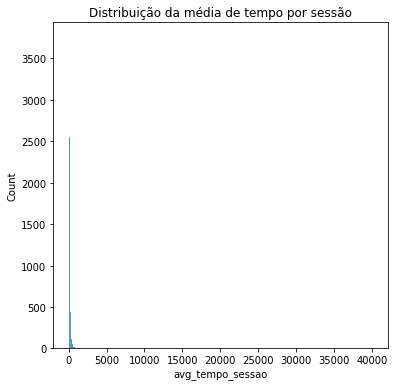

In [32]:
plt.figure(figsize = (6,6))

sns.histplot(df_limpo_filtro_idade['avg_tempo_sessao'])
plt.title('Distribuição da média de tempo por sessão')

Text(0.5, 1.0, 'Distribuição do percentual mobile')

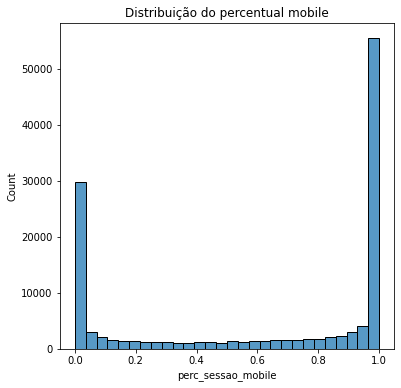

In [33]:
plt.figure(figsize = (6,6))

sns.histplot(df_limpo_filtro_idade['perc_sessao_mobile'])
plt.title('Distribuição do percentual mobile')

Concentração maior de pessoas que já acessaram/acessam bastante pelo celular

Text(0.5, 1.0, 'Distribuição do percentual desktop')

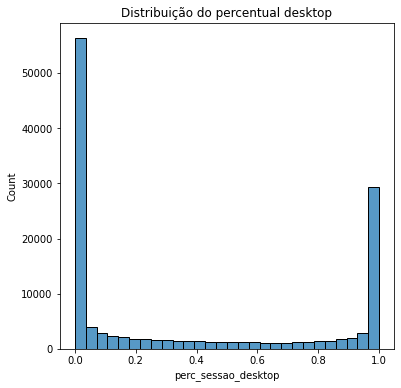

In [34]:
plt.figure(figsize = (6,6))

sns.histplot(df_limpo_filtro_idade['perc_sessao_desktop'])
plt.title('Distribuição do percentual desktop')

Concentração maior de pessoas que não chegaram a acessar pelo computador

Text(0.5, 1.0, 'Distribuição do percentual ao vivo')

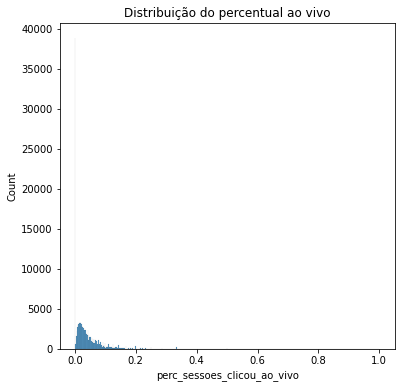

In [35]:
plt.figure(figsize = (6,6))

sns.histplot(df_limpo_filtro_idade['perc_sessoes_clicou_ao_vivo'])
plt.title('Distribuição do percentual ao vivo')

Concentração bem baixa de pessoas que assistem ao vivo. Aparentemente as pessoas assistem bem raramente conteudos ao vivo.

Text(0.5, 1.0, 'Distribuição do percentual 1 area')

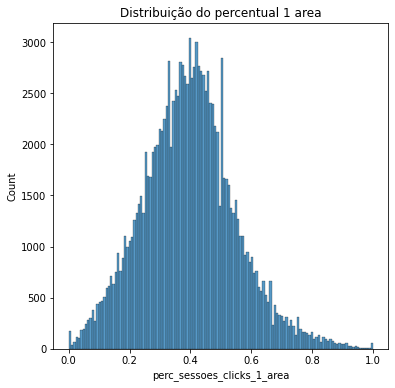

In [36]:
plt.figure(figsize = (6,6))

sns.histplot(df_limpo_filtro_idade['perc_sessoes_clicks_1_area'])
plt.title('Distribuição do percentual 1 area')

Concentração maior entre 0.3 e 0.5 (30-50% do tempo das pessoas ficam em uma área )

Text(0.5, 1.0, 'Distribuição do percentual 2 areas')

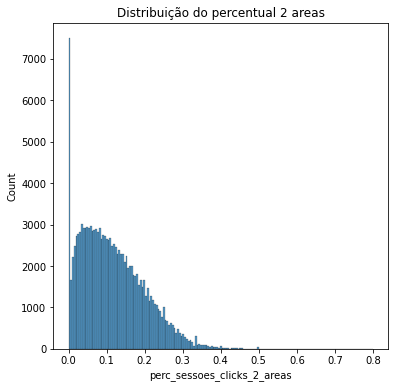

In [37]:
plt.figure(figsize = (6,6))

sns.histplot(df_limpo_filtro_idade['perc_sessoes_clicks_2_areas'])
plt.title('Distribuição do percentual 2 areas')

Distribuição é menor do que a de 1 área, com recorrencia alta do valor 0. 

Text(0.5, 1.0, 'Distribuição do percentual de clique em 1 tema')

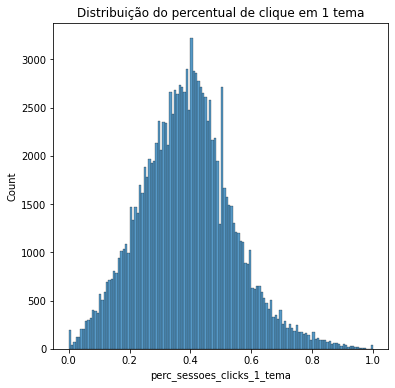

In [34]:
plt.figure(figsize = (6,6))

sns.histplot(df_limpo_filtro_idade['perc_sessoes_clicks_1_tema'])
plt.title('Distribuição do percentual de clique em 1 tema')

concentração maior entre 0.3 e 0.5

Text(0.5, 1.0, 'Distribuição do percentual de clique em 2 tema')

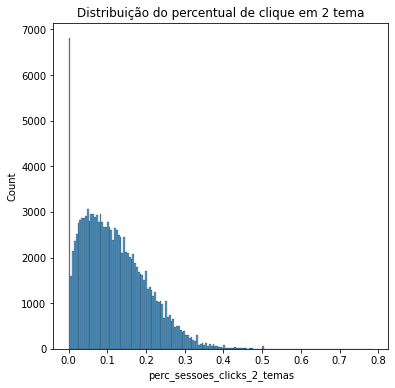

In [35]:
plt.figure(figsize = (6,6))

sns.histplot(df_limpo_filtro_idade['perc_sessoes_clicks_2_temas'])
plt.title('Distribuição do percentual de clique em 2 tema')

Text(0.5, 1.0, 'Distribuição da média de temas vistos por sessão')

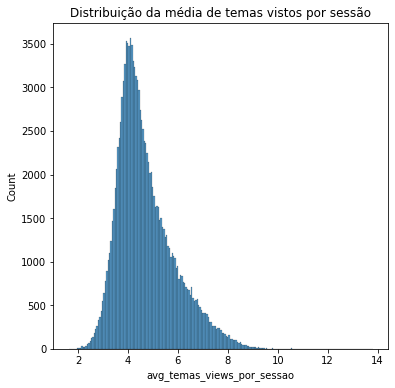

In [36]:
plt.figure(figsize = (6,6))

sns.histplot(df_limpo_filtro_idade['avg_temas_views_por_sessao'])
plt.title('Distribuição da média de temas vistos por sessão')

A média de temas (esporte, entreterimento, etc..) visto por sessão é bem alta, com concentração maior entre 4 e 5 temas.

Text(0.5, 1.0, 'Distribuição da média de áreas vistas por sessão')

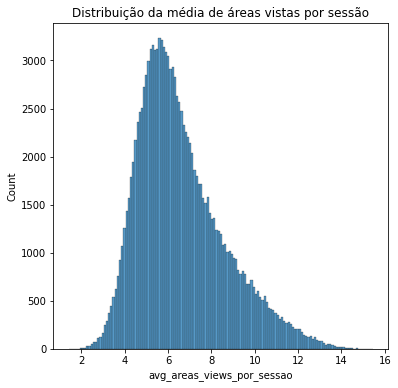

In [37]:
plt.figure(figsize = (6,6))

sns.histplot(df_limpo_filtro_idade['avg_areas_views_por_sessao'])
plt.title('Distribuição da média de áreas vistas por sessão')

concentração bem alta entre 5 e 7 aproximadamente.

<h4> 2.2 Análise Diagnóstica</h4><a id="22"></a>

Text(0.5, 1.0, 'Distribuição das Idades por gênero')

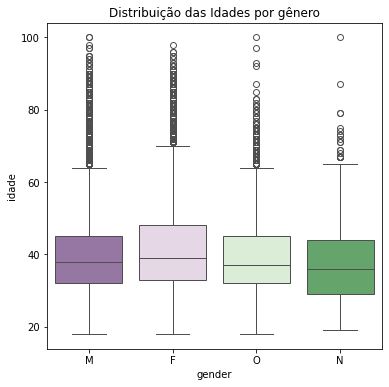

In [38]:
plt.figure(figsize = (6,6))

sns.boxplot(x="gender", y="idade", hue="gender",data=df_limpo_filtro_idade, palette="PRGn",showfliers=True)
plt.title('Distribuição das Idades por gênero')

In [39]:
df_limpo_filtro_idade.groupby(by='gender')[['perc_sessao_manha', 'perc_sessao_tarde', 'perc_sessao_noite',
       'perc_sessao_madrugada', 'perc_sessao_mobile', 'perc_sessao_desktop',
       'razao_sessao_g1_home', 'razao_sessao_ge_home',
       'razao_sessao_gshow_home', 'retorno_semanal', 'retorno_mensal',
       'clicks_total', 'perc_sessoes_click', 'perc_sessoes_click_video',
       'perc_sessoes_clicou_ao_vivo', 'perc_sessoes_clicks_1_tema',
       'perc_sessoes_clicks_2_temas', 'perc_sessoes_clicks_3_mais_temas',
       'perc_sessoes_clicks_1_area', 'perc_sessoes_clicks_2_areas',
       'perc_sessoes_clicks_3_mais_areas',
       'perc_sessoes_click_sessao_jornalismo',
       'perc_sessoes_click_sessao_esporte',
       'perc_sessoes_click_sessao_entretenimento',
       'perc_sessoes_click_sessao_receitas',
       'perc_sessoes_click_sessao_techtudo',
       'perc_sessoes_click_sessao_globoplay',
       'perc_sessoes_click_sessao_valor',
       'perc_sessoes_click_sessao_autoesporte',
       'perc_sessoes_click_sessao_outros', 'avg_clicks_por_sessao',
       'avg_clicks_temas_por_sessao', 'avg_clicks_areas_por_sessao',
       'avg_areas_views_por_sessao', 'avg_temas_views_por_sessao',
       'avg_views_por_sessao']].mean()

,perc_sessao_manha,perc_sessao_tarde,perc_sessao_noite,perc_sessao_madrugada,perc_sessao_mobile,perc_sessao_desktop,razao_sessao_g1_home,razao_sessao_ge_home,razao_sessao_gshow_home,retorno_semanal,retorno_mensal,clicks_total,perc_sessoes_click,perc_sessoes_click_video,perc_sessoes_clicou_ao_vivo,perc_sessoes_clicks_1_tema,perc_sessoes_clicks_2_temas,perc_sessoes_clicks_3_mais_temas,perc_sessoes_clicks_1_area,perc_sessoes_clicks_2_areas,perc_sessoes_clicks_3_mais_areas,perc_sessoes_click_sessao_jornalismo,perc_sessoes_click_sessao_esporte,perc_sessoes_click_sessao_entretenimento,perc_sessoes_click_sessao_receitas,perc_sessoes_click_sessao_techtudo,perc_sessoes_click_sessao_globoplay,perc_sessoes_click_sessao_valor,perc_sessoes_click_sessao_autoesporte,perc_sessoes_click_sessao_outros,avg_clicks_por_sessao,avg_clicks_temas_por_sessao,avg_clicks_areas_por_sessao,avg_areas_views_por_sessao,avg_temas_views_por_sessao,avg_views_por_sessao
gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
F,0.290160,0.336111,0.299936,0.073793,0.627014,0.367653,0.438493,0.318262,0.333165,3.868884,12.198655,251.561443,0.561422,0.031837,0.029971,0.375376,0.128565,0.057481,0.383831,0.123757,0.053834,0.270527,0.093208,0.262746,0.001394,0.004044,0.002045,0.000159,0.000026,0.033045,1.115532,0.868721,0.839313,7.194233,5.009570,45.189732
M,0.282178,0.327689,0.315720,0.074413,0.606160,0.388972,0.369429,0.937545,0.143402,4.177742,13.930141,301.141681,0.556153,0.024223,0.038784,0.395467,0.112990,0.047697,0.403271,0.111601,0.041282,0.232704,0.196585,0.147736,0.000501,0.005450,0.001041,0.000105,0.000042,0.022383,0.969312,0.810536,0.783756,6.344930,4.573062,40.284908
N,0.291942,0.351051,0.291646,0.065361,0.534438,0.461941,0.519410,0.529727,0.190526,4.101791,13.165878,258.103041,0.527611,0.024361,0.032424,0.375364,0.105464,0.046783,0.383168,0.103068,0.041375,0.248934,0.147258,0.175134,0.000608,0.006159,0.001248,0.000118,0.000029,0.022975,0.949147,0.781044,0.753113,6.695668,4.785592,43.625505
O,0.284019,0.331375,0.307745,0.076861,0.641292,0.353737,0.426569,0.584437,0.234380,4.002533,12.766242,238.735972,0.524629,0.024469,0.034178,0.367920,0.111262,0.045447,0.375133,0.108399,0.041096,0.246449,0.132093,0.188153,0.000793,0.004615,0.001239,0.000110,0.000036,0.024088,0.958062,0.776224,0.752115,6.630807,4.687166,41.448901


Text(0.5, 1.0, 'Distribuição da média de clicks em vídeos por sessão por gênero')

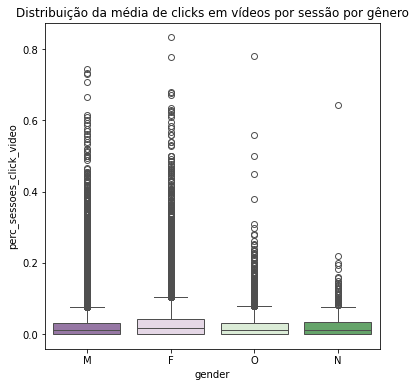

In [76]:
plt.figure(figsize = (6,6))

sns.boxplot(x="gender", y="perc_sessoes_click_video", hue="gender",data=df_limpo_filtro_idade, palette="PRGn",showfliers=True)
plt.title('Distribuição da média de clicks em vídeos por sessão por gênero')


Text(0.5, 1.0, 'Distribuição da média de cliques ao vivo por sessão por gênero')

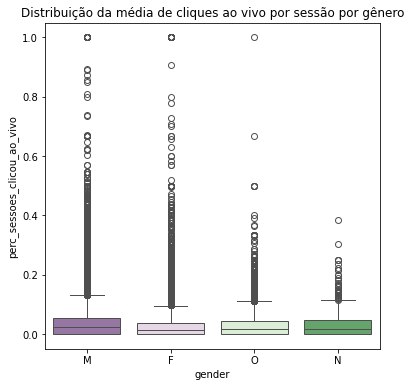

In [77]:
plt.figure(figsize = (6,6))

sns.boxplot(x="gender", y="perc_sessoes_clicou_ao_vivo", hue="gender",data=df_limpo_filtro_idade, palette="PRGn",showfliers=True)
plt.title('Distribuição da média de cliques ao vivo por sessão por gênero')


Homens tem uma distribuição maior de acessos em videos ao vivo

Text(0.5, 1.0, 'Distribuição da média de acessos em 2 temas por sessão por gênero')

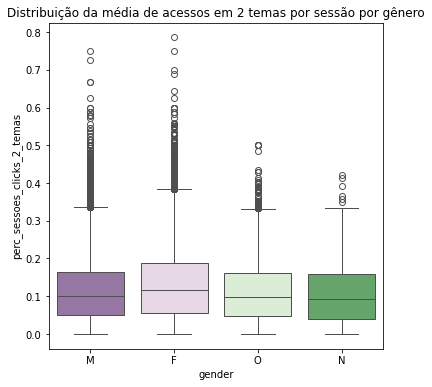

In [78]:
plt.figure(figsize = (6,6))

sns.boxplot(x="gender", y="perc_sessoes_clicks_2_temas", hue="gender",data=df_limpo_filtro_idade, palette="PRGn",showfliers=True)
plt.title('Distribuição da média de acessos em 2 temas por sessão por gênero')


Mulheres tem uma distribuição maior de acessos em 2 temas

Text(0.5, 1.0, 'Distribuição da média de acessos em 3 ou mais temas por sessão por gênero')

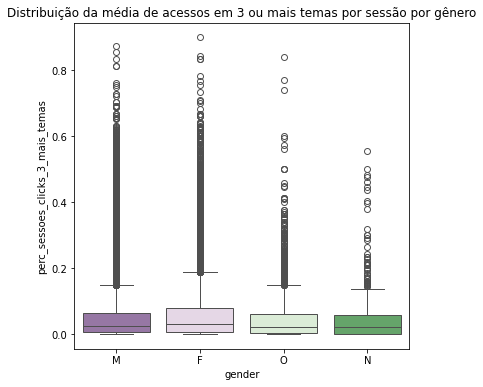

In [81]:
plt.figure(figsize = (6,6))

sns.boxplot(x="gender", y="perc_sessoes_clicks_3_mais_temas", hue="gender",data=df_limpo_filtro_idade, palette="PRGn",showfliers=True)
plt.title('Distribuição da média de acessos em 3 ou mais temas por sessão por gênero')


Mulheres com uma distribuição maior de acessos a mais de 3 temas. Indicando que ela tem uma abertura maior a acessar temas diferentes

Vamos compreender se tem diferença estatística. Através do Teste T. 

Teste T: Um teste t é usado para comparar a média de duas amostras dadas. Assume uma distribuição normal da amostra. Também pode ser uma amostra ou duas amostras. O grau de liberdade é calculado por n-1 onde n é o número de amostras. 

In [117]:
import pylab


In [84]:
def test_t_validation(df_0,df_1):
    t_stat, p = ttest_ind(df_0,df_1,equal_var=False)
 
    print(f"p_value: {p,3} t_stat: {round(t_stat,3)}")
    if p <=  0.05:
        print('Rejeitar a hipótese nula. Há uma diferença significativa')
    else:
        print('Não há uma diferença significativa.')

## Testando as hipóteses

Null Hypothesis: Não há diferença significativa entre o clique em 2 temas e o gênero do usuário.

Alternate Hypothesis: Há uma diferença significativa entre o clique em 2 temas e o gênero do usuário

In [131]:
class_0 = df_limpo_filtro_idade.loc[df_limpo_filtro_idade['gender'] == 'M']['perc_sessoes_clicks_2_temas']
class_1 = df_limpo_filtro_idade.loc[df_limpo_filtro_idade['gender'] == 'F']['perc_sessoes_clicks_2_temas']
class_2 = df_limpo_filtro_idade.loc[df_limpo_filtro_idade['gender'] == 'O']['perc_sessoes_clicks_2_temas']
class_3 = df_limpo_filtro_idade.loc[df_limpo_filtro_idade['gender'] == 'N']['perc_sessoes_clicks_2_temas']

In [132]:
test_t_validation(class_0,class_1)

p_value: (1.048684647630476e-185, 3) t_stat: -29.155
Rejeitar a hipótese nula. Há uma diferença significativa


In [133]:
test_t_validation(class_2,class_1)

p_value: (5.968975866873043e-34, 3) t_stat: -12.245
Rejeitar a hipótese nula. Há uma diferença significativa


In [134]:
test_t_validation(class_3,class_1)

p_value: (1.1252398938320766e-11, 3) t_stat: -6.922
Rejeitar a hipótese nula. Há uma diferença significativa


Null Hypothesis: Não há diferença significativa entre o clique em mais de 3 temas e o gênero do usuário.

Alternate Hypothesis: Há uma diferença significativa entre o clique em mais de 3 temas e o gênero do usuário

In [89]:
class_0 = df.loc[df['gender'] == 'M']['perc_sessoes_clicks_3_mais_temas']
class_1 = df.loc[df['gender'] == 'F']['perc_sessoes_clicks_3_mais_temas']
class_2 = df.loc[df['gender'] == 'O']['perc_sessoes_clicks_3_mais_temas']
class_3 = df.loc[df['gender'] == 'N']['perc_sessoes_clicks_3_mais_temas']

In [90]:
test_t_validation(class_0,class_1)

p_value: (4.350156202818336e-130, 3) t_stat: -24.307
Rejeitar a hipótese nula. Há uma diferença significativa


In [91]:
test_t_validation(class_2,class_1)

p_value: (1.31513346725707e-26, 3) t_stat: -10.731
Rejeitar a hipótese nula. Há uma diferença significativa


In [92]:
test_t_validation(class_3,class_1)

p_value: (5.674926356917267e-05, 3) t_stat: -4.047
Rejeitar a hipótese nula. Há uma diferença significativa


Text(0.5, 1.0, 'Distribuição da média de acessos em 1 tema por sessão por gênero')

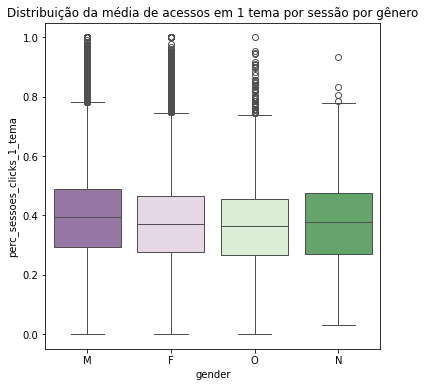

In [102]:
plt.figure(figsize = (6,6))

sns.boxplot(x="gender", y="perc_sessoes_clicks_1_tema", hue="gender",data=df_limpo_filtro_idade, palette="PRGn",showfliers=True)
plt.title('Distribuição da média de acessos em 1 tema por sessão por gênero')



Homens costumam acessar mais 1 tema.

Null Hypothesis: Não há diferença significativa entre o clique em 1 tema e o gênero do usuário.

Alternate Hypothesis: Há uma diferença significativa entre o clique em 1 tema e o gênero do usuário

In [103]:
class_0 = df.loc[df['gender'] == 'M']['perc_sessoes_clicks_1_tema']
class_1 = df.loc[df['gender'] == 'F']['perc_sessoes_clicks_1_tema']
class_2 = df.loc[df['gender'] == 'O']['perc_sessoes_clicks_1_tema']
class_3 = df.loc[df['gender'] == 'N']['perc_sessoes_clicks_1_tema']

In [104]:
test_t_validation(class_0,class_1)

p_value: (4.992074385917498e-80, 3) t_stat: 18.96
Rejeitar a hipótese nula. Há uma diferença significativa


In [105]:
test_t_validation(class_0,class_2)

p_value: (1.3399661873314414e-25, 3) t_stat: 10.518
Rejeitar a hipótese nula. Há uma diferença significativa


In [106]:
test_t_validation(class_0,class_3)

p_value: (0.0004435068649372314, 3) t_stat: 3.528
Rejeitar a hipótese nula. Há uma diferença significativa


Text(0.5, 1.0, 'Distribuição da média de visualização por sessão por gênero')

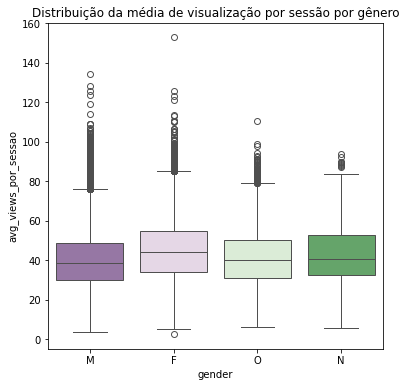

In [40]:
plt.figure(figsize = (6,6))

sns.boxplot(x="gender", y="avg_views_por_sessao", hue="gender",data=df_limpo_filtro_idade, palette="PRGn",showfliers=True)
plt.title('Distribuição da média de visualização por sessão por gênero')

Mulheres tem uma distribuição de visualizações por sessão maior do que os outros gêneros

Text(0.5, 1.0, 'Distribuição do percentual de sessões na parte da manhã por gênero')

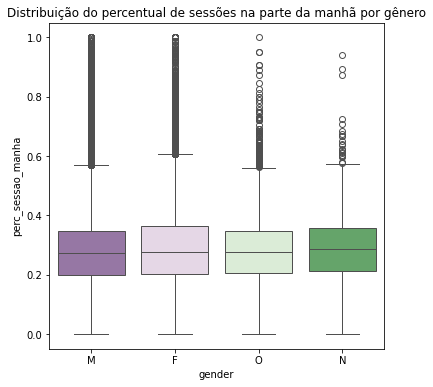

In [40]:
plt.figure(figsize = (6,6))

sns.boxplot(x="gender", y="perc_sessao_manha", hue="gender",data=df_limpo_filtro_idade, palette="PRGn",showfliers=True)
plt.title('Distribuição do percentual de sessões na parte da manhã por gênero')

In [52]:
def distribuicao_genero(df,coluna):
    class_0 = df.loc[df['gender'] == 'M'][coluna]
    class_1 = df.loc[df['gender'] == 'F'][coluna]
    class_2 = df.loc[df['gender'] == 'O'][coluna]
    class_3 = df.loc[df['gender'] == 'N'][coluna]
    plt.figure(figsize = (14,6))
    plt.title(f'Distribuição do percentual de sessões {coluna} X gênero')
    sns.distplot(class_0,kde=True,bins=200, color="green")
    sns.distplot(class_1,kde=True,bins=200, color="red")
    sns.distplot(class_2,kde=True,bins=200, color="blue")
    sns.distplot(class_3,kde=True,bins=200, color="yellow")
    
    plt.legend(['M','F','O','N'])
    plt.show()

/var/folders/x9/677608_s3v59vr4xn87k94d40000gn/T/ipykernel_12614/329711460.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class_0,kde=True,bins=200, color="green")
/var/folders/x9/677608_s3v59vr4xn87k94d40000gn/T/ipykernel_12614/329711460.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

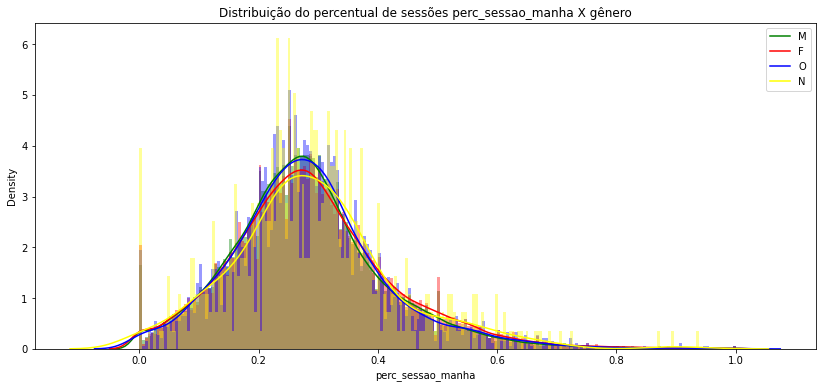

In [53]:
distribuicao_genero(df_limpo_filtro_idade,'perc_sessao_manha')

/var/folders/x9/677608_s3v59vr4xn87k94d40000gn/T/ipykernel_12614/329711460.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class_0,kde=True,bins=200, color="green")
/var/folders/x9/677608_s3v59vr4xn87k94d40000gn/T/ipykernel_12614/329711460.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

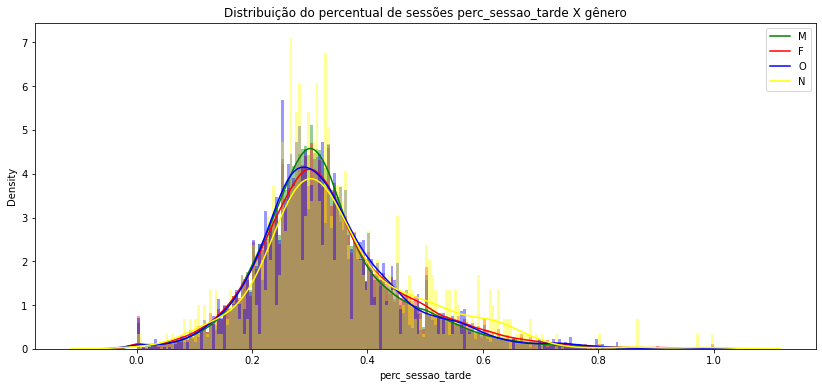

In [54]:
distribuicao_genero(df_limpo_filtro_idade,'perc_sessao_tarde')

Não tem diferença de comportamento entre as sessões na parte da tarde. Muitos valores então concentradas entre 0.2 e 0.4

/var/folders/x9/677608_s3v59vr4xn87k94d40000gn/T/ipykernel_12614/329711460.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class_0,kde=True,bins=200, color="green")
/var/folders/x9/677608_s3v59vr4xn87k94d40000gn/T/ipykernel_12614/329711460.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

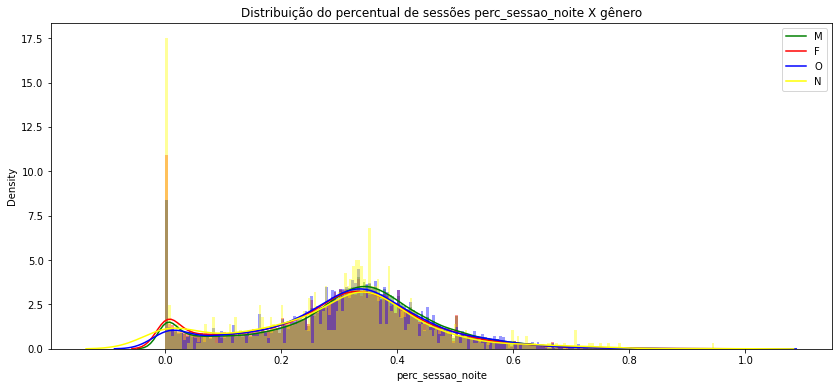

In [55]:
distribuicao_genero(df_limpo_filtro_idade,'perc_sessao_noite')

Dentro de cada grupo de gêneros temos 2 comportamentos diferentes (podendo ser visualizada nas duas ondas no gráfico: mais acentuadas nos gêneros masculino e feminino). Tem pessoas que não acessam a noite (valores próximos de 0) e pessoas que costumam ter sessões a noite com recorrência (próximo de 0.4)



/var/folders/x9/677608_s3v59vr4xn87k94d40000gn/T/ipykernel_12614/329711460.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(class_0,kde=True,bins=200, color="green")
/var/folders/x9/677608_s3v59vr4xn87k94d40000gn/T/ipykernel_12614/329711460.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

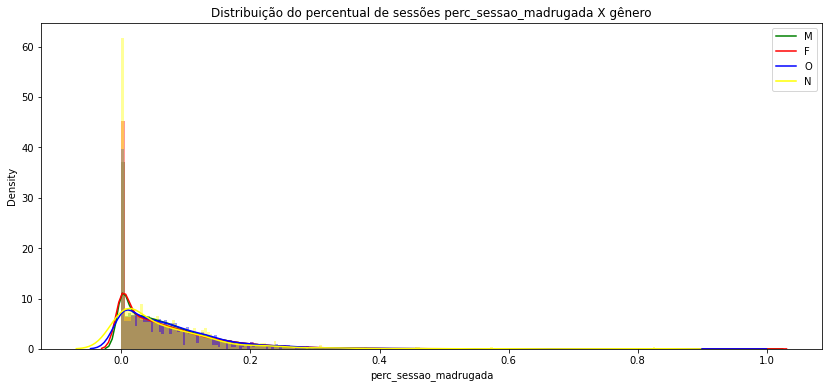

In [56]:
distribuicao_genero(df_limpo_filtro_idade,'perc_sessao_madrugada')

Percentual de mulheres de madrugada é bem baixo comparado com os outros gêneros

In [57]:
ages = pd.DataFrame(df_limpo_filtro_idade['idade'])

bins = [18, 30, 40, 50, 60, 70, 100]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
ages['agerange'] = pd.cut(df_limpo_filtro_idade.idade, bins, labels = labels,include_lowest = True)
df_idade = pd.concat([df_limpo_filtro_idade, ages], axis=1)

In [58]:
df_idade

,userid,pageviews,sessoes,page_sessao,avg_tempo_sessao,perc_sessao_manha,perc_sessao_tarde,perc_sessao_noite,perc_sessao_madrugada,perc_sessao_mobile,perc_sessao_desktop,razao_sessao_g1_home,razao_sessao_ge_home,razao_sessao_gshow_home,retorno_semanal,retorno_mensal,clicks_total,perc_sessoes_click,perc_sessoes_click_video,perc_sessoes_clicou_ao_vivo,perc_sessoes_clicks_1_tema,perc_sessoes_clicks_2_temas,perc_sessoes_clicks_3_mais_temas,perc_sessoes_clicks_1_area,perc_sessoes_clicks_2_areas,perc_sessoes_clicks_3_mais_areas,perc_sessoes_click_sessao_jornalismo,perc_sessoes_click_sessao_esporte,perc_sessoes_click_sessao_entretenimento,perc_sessoes_click_sessao_receitas,perc_sessoes_click_sessao_techtudo,perc_sessoes_click_sessao_globoplay,perc_sessoes_click_sessao_valor,perc_sessoes_click_sessao_autoesporte,perc_sessoes_click_sessao_outros,avg_clicks_por_sessao,avg_clicks_temas_por_sessao,avg_clicks_areas_por_sessao,avg_areas_views_por_sessao,avg_temas_views_por_sessao,avg_views_por_sessao,address_state,idade,gender,idade,agerange
1,G_60891,487,376,1.295213,28.751184,0.169492,0.277542,0.519068,0.033898,0.991525,0.008475,0.069149,0.702128,0.005319,4.416667,19.272727,75,0.188830,0.002660,0.000000,0.180851,0.005319,0.002660,0.183511,0.005319,0.000000,0.015957,0.061170,0.005319,0.000000,0.000000,0.0,0.0,0.0,0.002660,0.234683,0.234683,0.229624,3.390801,2.991759,16.942771,Distrito Federal,47,M,47,40-49
3,G_119135,226,136,1.661765,62.789542,0.251613,0.296774,0.412903,0.038710,0.890323,0.109677,0.279412,0.411765,0.051471,3.937500,10.500000,97,0.522059,0.000000,0.000000,0.448529,0.051471,0.022059,0.433824,0.058824,0.029412,0.367647,0.066176,0.117647,0.000000,0.000000,0.0,0.0,0.0,0.029412,0.637720,0.583101,0.592549,5.167181,3.778755,26.345499,Distrito Federal,37,M,37,30-39
4,G_29373,78,42,1.857143,68.514023,0.186047,0.255814,0.325581,0.232558,1.000000,0.000000,0.595238,0.023810,0.190476,1.705882,3.222222,41,0.500000,0.000000,0.000000,0.380952,0.119048,0.000000,0.357143,0.142857,0.000000,0.404762,0.047619,0.095238,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.018301,0.735621,0.645752,5.813399,4.082680,28.657843,São Paulo,34,F,34,30-39
5,G_141103,1387,660,2.101515,148.205085,0.269972,0.314050,0.325069,0.090909,0.760331,0.239669,0.651515,0.042424,0.025758,5.300000,19.272727,810,0.596970,0.072727,0.137143,0.378788,0.142424,0.075758,0.368182,0.162121,0.066667,0.468182,0.034848,0.051515,0.000000,0.027273,0.0,0.0,0.0,0.054545,1.154844,0.990214,0.885143,7.194294,5.182156,43.226269,Bahia,25,M,25,18-29
6,G_115811,93,82,1.134146,33.321868,0.362637,0.219780,0.318681,0.098901,0.989011,0.010989,0.426829,0.048780,0.109756,3.142857,5.500000,50,0.487805,0.000000,0.034483,0.426829,0.060976,0.000000,0.414634,0.073171,0.000000,0.329268,0.012195,0.146341,0.000000,0.012195,0.0,0.0,0.0,0.000000,0.518003,0.466592,0.471518,7.256068,4.812853,39.913211,São Paulo,26,F,26,18-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161751,G_60392,705,223,3.161435,503.141331,0.508264,0.462810,0.028926,0.000000,0.078512,0.921488,0.452915,0.121076,0.242152,4.608696,15.142857,241,0.475336,0.035874,0.032051,0.291480,0.094170,0.089686,0.286996,0.121076,0.067265,0.318386,0.107623,0.156951,0.000000,0.004484,0.0,0.0,0.0,0.026906,1.012079,0.768610,0.741890,10.174271,6.746496,71.111325,São Paulo,34,F,34,30-39
161752,G_32070,1019,614,1.659609,76.984843,0.294203,0.324638,0.331884,0.049275,0.872464,0.127536,0.084691,0.060261,0.009772,6.166667,23.125000,213,0.278502,0.052117,0.026627,0.239414,0.032573,0.006515,0.237785,0.032573,0.008143,0.148208,0.073290,0.019544,0.001629,0.006515,0.0,0.0,0.0,0.057003,0.386583,0.363407,0.370178,7.136021,4.642165,37.996724,São Paulo,39,M,39,30-39
161753,G_7242,1127,340,3.314706,422.013980,0.262857,0.548571,0.180000,0.008571,0.000000,1.000000,0.314706,0.550000,0.058824,3.820513,13.545455,460,0.623529,0.014706,0.031250,0.37058

<Axes: xlabel='idade', ylabel='clicks_total'>

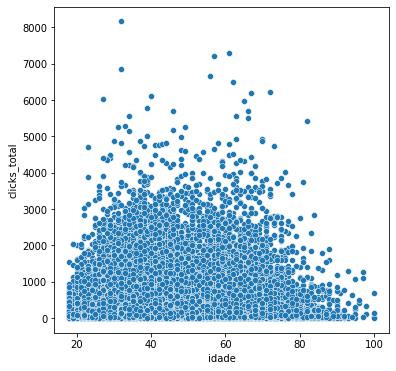

In [59]:
plt.figure(figsize = (6,6))

sns.scatterplot(x='idade',y='clicks_total',data =df_limpo_filtro_idade)

In [60]:
df_idade.groupby(by='agerange')[['perc_sessao_manha', 'perc_sessao_tarde', 'perc_sessao_noite',
       'perc_sessao_madrugada', 'perc_sessao_mobile', 'perc_sessao_desktop',
       'razao_sessao_g1_home', 'razao_sessao_ge_home',
       'razao_sessao_gshow_home', 'retorno_semanal', 'retorno_mensal',
       'clicks_total', 'perc_sessoes_click', 'perc_sessoes_click_video',
       'perc_sessoes_clicou_ao_vivo', 'perc_sessoes_clicks_1_tema',
       'perc_sessoes_clicks_2_temas', 'perc_sessoes_clicks_3_mais_temas',
       'perc_sessoes_clicks_1_area', 'perc_sessoes_clicks_2_areas',
       'perc_sessoes_clicks_3_mais_areas',
       'perc_sessoes_click_sessao_jornalismo',
       'perc_sessoes_click_sessao_esporte',
       'perc_sessoes_click_sessao_entretenimento',
       'perc_sessoes_click_sessao_receitas',
       'perc_sessoes_click_sessao_techtudo',
       'perc_sessoes_click_sessao_globoplay',
       'perc_sessoes_click_sessao_valor',
       'perc_sessoes_click_sessao_autoesporte',
       'perc_sessoes_click_sessao_outros', 'avg_clicks_por_sessao',
       'avg_clicks_temas_por_sessao', 'avg_clicks_areas_por_sessao',
       'avg_areas_views_por_sessao', 'avg_temas_views_por_sessao',
       'avg_views_por_sessao']].mean()

/var/folders/x9/677608_s3v59vr4xn87k94d40000gn/T/ipykernel_12614/1982917442.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_idade.groupby(by='agerange')[['perc_sessao_manha', 'perc_sessao_tarde', 'perc_sessao_noite',


,perc_sessao_manha,perc_sessao_tarde,perc_sessao_noite,perc_sessao_madrugada,perc_sessao_mobile,perc_sessao_desktop,razao_sessao_g1_home,razao_sessao_ge_home,razao_sessao_gshow_home,retorno_semanal,retorno_mensal,clicks_total,perc_sessoes_click,perc_sessoes_click_video,perc_sessoes_clicou_ao_vivo,perc_sessoes_clicks_1_tema,perc_sessoes_clicks_2_temas,perc_sessoes_clicks_3_mais_temas,perc_sessoes_clicks_1_area,perc_sessoes_clicks_2_areas,perc_sessoes_clicks_3_mais_areas,perc_sessoes_click_sessao_jornalismo,perc_sessoes_click_sessao_esporte,perc_sessoes_click_sessao_entretenimento,perc_sessoes_click_sessao_receitas,perc_sessoes_click_sessao_techtudo,perc_sessoes_click_sessao_globoplay,perc_sessoes_click_sessao_valor,perc_sessoes_click_sessao_autoesporte,perc_sessoes_click_sessao_outros,avg_clicks_por_sessao,avg_clicks_temas_por_sessao,avg_clicks_areas_por_sessao,avg_areas_views_por_sessao,avg_temas_views_por_sessao,avg_views_por_sessao
agerange,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
18-29,0.277157,0.341868,0.307396,0.073579,0.538342,0.458451,0.414766,1.080041,0.210604,3.819379,12.164205,197.303500,0.511452,0.017468,0.040444,0.383974,0.093816,0.033662,0.390843,0.091414,0.029196,0.199711,0.151640,0.147147,0.000421,0.004076,0.000903,0.000069,0.000026,0.016258,0.831840,0.705675,0.685831,6.010674,4.426478,39.191151
30-39,0.283757,0.328966,0.311793,0.075484,0.643071,0.353212,0.366425,0.735133,0.192806,4.075056,13.422693,267.685604,0.535753,0.024002,0.036453,0.382481,0.109338,0.043933,0.390651,0.106925,0.038177,0.230334,0.157522,0.173170,0.000529,0.004630,0.001035,0.000094,0.000031,0.023531,0.941220,0.780954,0.753907,6.477192,4.604879,40.823386
40-49,0.288732,0.323875,0.312955,0.074438,0.647837,0.347361,0.374068,0.607793,0.193588,4.171619,13.789609,315.062058,0.584247,0.031270,0.033606,0.395192,0.130500,0.058555,0.403371,0.128110,0.052766,0.265876,0.172124,0.205118,0.000873,0.005479,0.001532,0.000138,0.000049,0.030528,1.110106,0.891785,0.861700,6.949006,4.875497,43.375445
50-59,0.289072,0.331423,0.308354,0.071151,0.586618,0.405441,0.438501,0.584842,0.227011,4.191077,13.802053,355.917541,0.614939,0.035070,0.034496,0.400664,0.142933,0.071342,0.408937,0.140449,0.065554,0.293771,0.177994,0.217309,0.001386,0.005836,0.002150,0.000190,0.000044,0.033634,1.230704,0.968247,0.935403,7.065147,4.998624,44.529940
60-69,0.287788,0.329660,0.308675,0.073877,0.577071,0.411183,0.471108,0.585700,0.246028,4.273412,14.115491,388.852586,0.611432,0.035233,0.031894,0.395164,0.143064,0.073205,0.403760,0.140505,0.067167,0.293202,0.176155,0.215388,0.001796,0.006309,0.002311,0.000205,0.000048,0.033891,1.226236,0.966718,0.932299,7.078167,5.011875,44.503432
70+,0.291783,0.333037,0.305034,0.070147,0.496686,0.487363,0.487452,0.529271,0.231042,4.272478,13.831522,365.780845,0.605606,0.034005,0.032859,0.391180,0.143086,0.071340,0.399828,0.138196,0.067583,0.291884,0.168954,0.208601,0.001960,0.007449,0.002849,0.000398,0.000050,0.030353,1.215630,0.954758,0.927680,7.033910,5.033282,45.341640


## A preferência de pessoas mais novas é o celular?

<Axes: xlabel='agerange', ylabel='perc_sessao_mobile'>

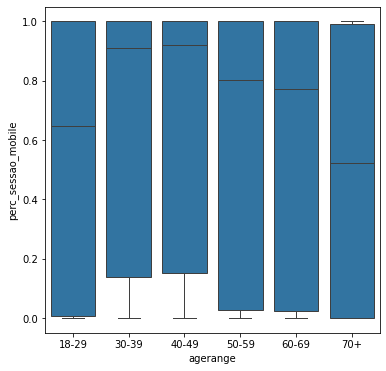

In [61]:
plt.figure(figsize = (6,6))

sns.boxplot(x='agerange',y='perc_sessao_mobile',data=df_idade)

Quem tem mais sessões pelo celular são pessoas entre 30 e 49 anos. Cujo Q3 (terceiro quartil) é próximo do valor máximo, como a mediana está próxima do Q3 sugere que a distribuição dos dados é assimétrica e tende a ser mais inclinada para o lado direito (ou seja, há mais valores maiores do que menores). 

Um outro ponto interessante é que a mediana das pessoas acima de 70 anos, ela é a mais baixa dentre as outras idades.

## E em relação ao computador?

<Axes: xlabel='agerange', ylabel='perc_sessao_desktop'>

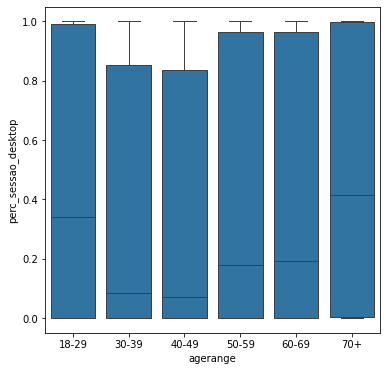

In [62]:
plt.figure(figsize = (6,6))

sns.boxplot(x='agerange',y='perc_sessao_desktop',data=df_idade)

O computador acaba não sendo a principal referência para pessoas entre 30 e 49 anos. Todavia apresenta um percentual maior entre pessoas acima de 70 anos e entre 18 e 29 anos.

### O percentual das sessões no periodo da manhã, tarde e noite muda conforme a idade?

<Axes: xlabel='agerange', ylabel='perc_sessao_manha'>

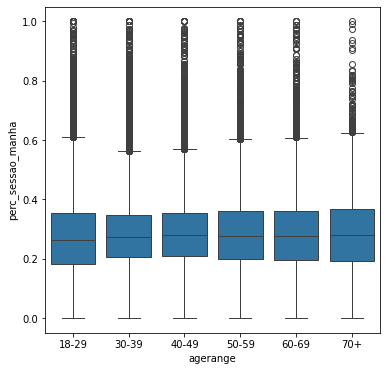

In [63]:
plt.figure(figsize = (6,6))

sns.boxplot(x='agerange',y='perc_sessao_manha',data=df_idade)

<Axes: xlabel='agerange', ylabel='perc_sessao_tarde'>

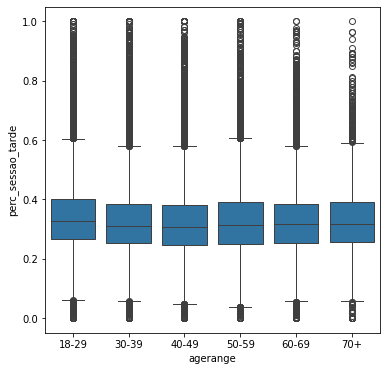

In [64]:
plt.figure(figsize = (6,6))

sns.boxplot(x='agerange',y='perc_sessao_tarde',data=df_idade)

<Axes: xlabel='agerange', ylabel='perc_sessao_noite'>

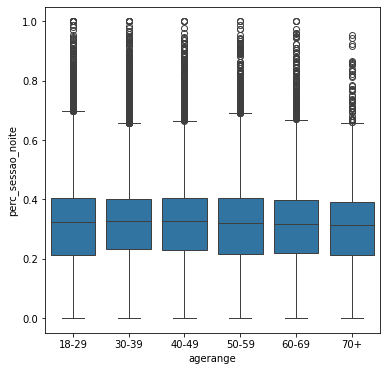

In [65]:
plt.figure(figsize = (6,6))

sns.boxplot(x='agerange',y='perc_sessao_noite',data=df_idade)

<Axes: xlabel='agerange', ylabel='perc_sessao_madrugada'>

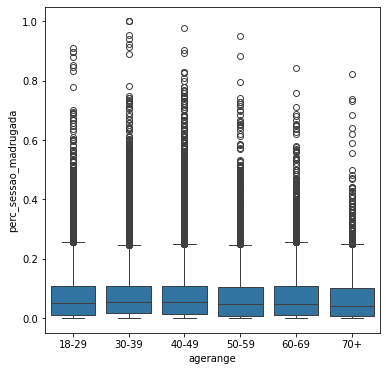

In [66]:
plt.figure(figsize = (6,6))

sns.boxplot(x='agerange',y='perc_sessao_madrugada',data=df_idade)

A idade não tem influencia na distribuição do percentual das sessões nos periodos da manhã, tarde e noite. A distribuição e os boxplots dos valores por range de idade estão bem semelhantes

<Axes: xlabel='agerange', ylabel='clicks_total'>

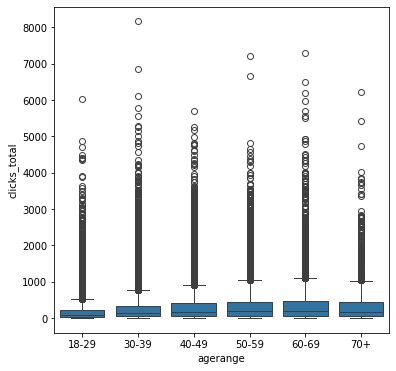

In [67]:
plt.figure(figsize = (6,6))

sns.boxplot(x='agerange',y='clicks_total',data=df_idade)

entre 18 e 29 anos há uma distribuição menor de quantidade de clicks necessárias, inclusive a mediana é a menor que todos.
Entre 50 e 69 anos tem uma distribuição bem parecida, cuja mediana é maior do que os outros ranges.



<Axes: xlabel='agerange', ylabel='Count'>

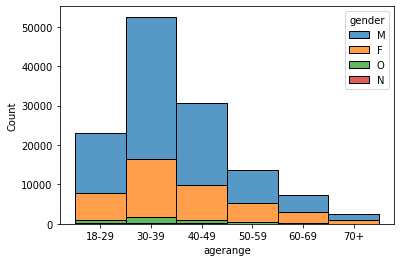

In [68]:
sns.histplot(binwidth=0.5, x="agerange", hue="gender", data=df_idade, stat="count", multiple="stack")


Concentração maior de homens, mulheres e O estão entre 30-39 anos. N não aparece no gráfico mostrando que a quantidade de amostra é bem baixa

<h4> 2.3 Correlação entre as variáveis</h4><a id="23"></a>

Há correlação entre as variáveis?

Através da correlação de Pearson iremos investigar relacionamentos lineares.

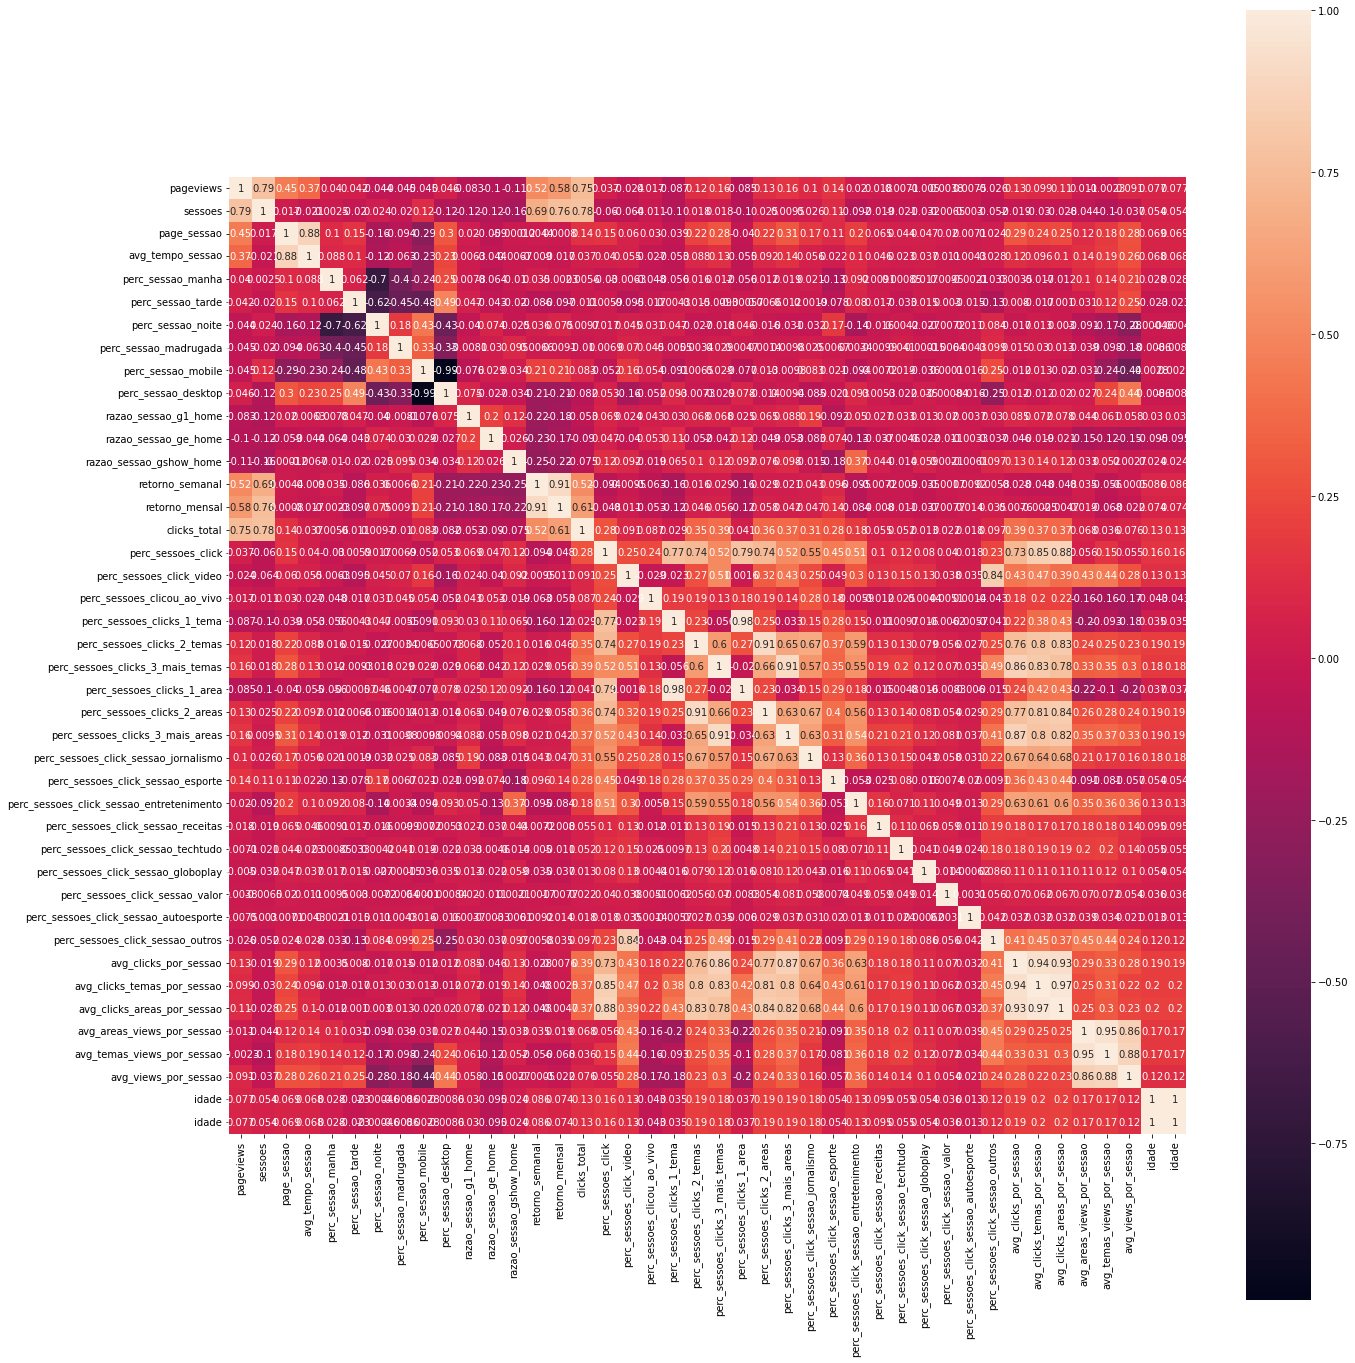

In [57]:
plt.rc('figure', figsize = (20,20))

to_corr = df_idade[['pageviews', 'sessoes', 'page_sessao', 'avg_tempo_sessao',
       'perc_sessao_manha', 'perc_sessao_tarde', 'perc_sessao_noite',
       'perc_sessao_madrugada', 'perc_sessao_mobile', 'perc_sessao_desktop',
       'razao_sessao_g1_home', 'razao_sessao_ge_home',
       'razao_sessao_gshow_home', 'retorno_semanal', 'retorno_mensal',
       'clicks_total', 'perc_sessoes_click', 'perc_sessoes_click_video',
       'perc_sessoes_clicou_ao_vivo', 'perc_sessoes_clicks_1_tema',
       'perc_sessoes_clicks_2_temas', 'perc_sessoes_clicks_3_mais_temas',
       'perc_sessoes_clicks_1_area', 'perc_sessoes_clicks_2_areas',
       'perc_sessoes_clicks_3_mais_areas',
       'perc_sessoes_click_sessao_jornalismo',
       'perc_sessoes_click_sessao_esporte',
       'perc_sessoes_click_sessao_entretenimento',
       'perc_sessoes_click_sessao_receitas',
       'perc_sessoes_click_sessao_techtudo',
       'perc_sessoes_click_sessao_globoplay',
       'perc_sessoes_click_sessao_valor',
       'perc_sessoes_click_sessao_autoesporte',
       'perc_sessoes_click_sessao_outros', 'avg_clicks_por_sessao',
       'avg_clicks_temas_por_sessao', 'avg_clicks_areas_por_sessao',
       'avg_areas_views_por_sessao', 'avg_temas_views_por_sessao',
       'avg_views_por_sessao','idade']]
corr = to_corr.corr('pearson')
fig = sns.heatmap(corr, annot=True, square=True)
_ = plt.tight_layout()

Através da correlação de Spearman iremos identificar correlações que não são lineares

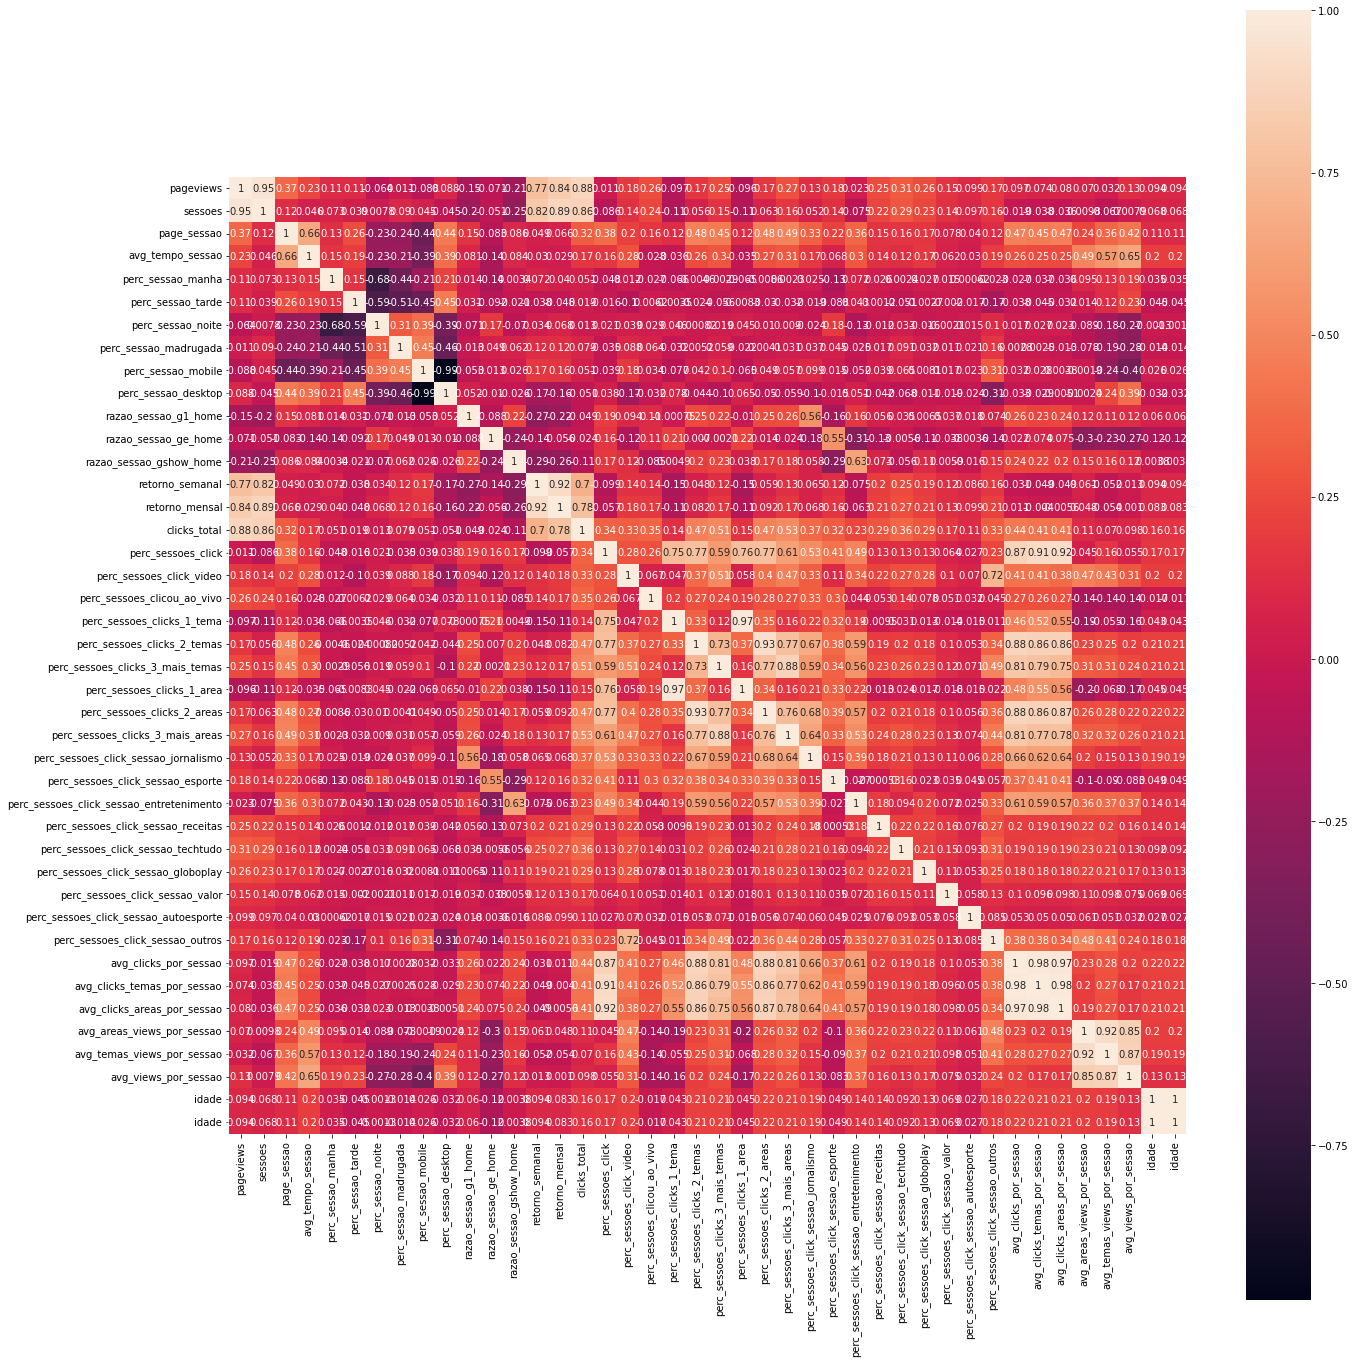

In [58]:
plt.rc('figure', figsize = (20,20))

to_corr = df_idade[['pageviews', 'sessoes', 'page_sessao', 'avg_tempo_sessao',
       'perc_sessao_manha', 'perc_sessao_tarde', 'perc_sessao_noite',
       'perc_sessao_madrugada', 'perc_sessao_mobile', 'perc_sessao_desktop',
       'razao_sessao_g1_home', 'razao_sessao_ge_home',
       'razao_sessao_gshow_home', 'retorno_semanal', 'retorno_mensal',
       'clicks_total', 'perc_sessoes_click', 'perc_sessoes_click_video',
       'perc_sessoes_clicou_ao_vivo', 'perc_sessoes_clicks_1_tema',
       'perc_sessoes_clicks_2_temas', 'perc_sessoes_clicks_3_mais_temas',
       'perc_sessoes_clicks_1_area', 'perc_sessoes_clicks_2_areas',
       'perc_sessoes_clicks_3_mais_areas',
       'perc_sessoes_click_sessao_jornalismo',
       'perc_sessoes_click_sessao_esporte',
       'perc_sessoes_click_sessao_entretenimento',
       'perc_sessoes_click_sessao_receitas',
       'perc_sessoes_click_sessao_techtudo',
       'perc_sessoes_click_sessao_globoplay',
       'perc_sessoes_click_sessao_valor',
       'perc_sessoes_click_sessao_autoesporte',
       'perc_sessoes_click_sessao_outros', 'avg_clicks_por_sessao',
       'avg_clicks_temas_por_sessao', 'avg_clicks_areas_por_sessao',
       'avg_areas_views_por_sessao', 'avg_temas_views_por_sessao',
       'avg_views_por_sessao','idade']]
corr = to_corr.corr('spearman')
fig = sns.heatmap(corr, annot=True, square=True)
_ = plt.tight_layout()

## 3. Pré-processamento<a id="3"></a>


As variáveis estão com distribuições diferentes, como os modelos de segmentação são sensíveis a distribuição do dado, é importante fazer a escala.

<h4> 3.1 Escalando os dados </h4><a id="31"></a>

In [60]:
x = df_limpo_filtro_idade.drop(['userid','gender','address_state', 'perc_sessoes_click', 'perc_sessoes_clicks_1_tema','perc_sessoes_clicks_2_temas','perc_sessoes_clicks_3_mais_temas'],axis=1)
x.head()

,pageviews,sessoes,page_sessao,avg_tempo_sessao,perc_sessao_manha,perc_sessao_tarde,perc_sessao_noite,perc_sessao_madrugada,perc_sessao_mobile,perc_sessao_desktop,razao_sessao_g1_home,razao_sessao_ge_home,razao_sessao_gshow_home,retorno_semanal,retorno_mensal,clicks_total,perc_sessoes_click_video,perc_sessoes_clicou_ao_vivo,perc_sessoes_clicks_1_area,perc_sessoes_clicks_2_areas,perc_sessoes_clicks_3_mais_areas,perc_sessoes_click_sessao_jornalismo,perc_sessoes_click_sessao_esporte,perc_sessoes_click_sessao_entretenimento,perc_sessoes_click_sessao_receitas,perc_sessoes_click_sessao_techtudo,perc_sessoes_click_sessao_globoplay,perc_sessoes_click_sessao_valor,perc_sessoes_click_sessao_autoesporte,perc_sessoes_click_sessao_outros,avg_clicks_por_sessao,avg_clicks_temas_por_sessao,avg_clicks_areas_por_sessao,avg_areas_views_por_sessao,avg_temas_views_por_sessao,avg_views_por_sessao,idade
1,487,376,1.295213,28.751184,0.169492,0.277542,0.519068,0.033898,0.991525,0.008475,0.069149,0.702128,0.005319,4.416667,19.272727,75,0.002660,0.000000,0.183511,0.005319,0.000000,0.015957,0.061170,0.005319,0.0,0.000000,0.0,0.0,0.0,0.002660,0.234683,0.234683,0.229624,3.390801,2.991759,16.942771,47
3,226,136,1.661765,62.789542,0.251613,0.296774,0.412903,0.038710,0.890323,0.109677,0.279412,0.411765,0.051471,3.937500,10.500000,97,0.000000,0.000000,0.433824,0.058824,0.029412,0.367647,0.066176,0.117647,0.0,0.000000,0.0,0.0,0.0,0.029412,0.637720,0.583101,0.592549,5.167181,3.778755,26.345499,37
4,78,42,1.857143,68.514023,0.186047,0.255814,0.325581,0.232558,1.000000,0.000000,0.595238,0.023810,0.190476,1.705882,3.222222,41,0.000000,0.000000,0.357143,0.142857,0.000000,0.404762,0.047619,0.095238,0.0,0.000000,0.0,0.0,0.0,0.000000,1.018301,0.735621,0.645752,5.813399,4.082680,28.657843,34
5,1387,660,2.101515,148.205085,0.269972,0.314050,0.325069,0.090909,0.760331,0.239669,0.651515,0.042424,0.025758,5.300000,19.272727,810,0.072727,0.137143,0.368182,0.162121,0.066667,0.468182,0.034848,0.051515,0.0,0.027273,0.0,0.0,0.0,0.054545,1.154844,0.990214,0.885143,7.194294,5.182156,43.226269,25
6,93,82,1.134146,33.321868,0.362637,0.219780,0.318681,0.098901,0.989011,0.010989,0.426829,0.048780,0.109756,3.142857,5.500000,50,0.000000,0.034483,0.414634,0.073171,0.000000,0.329268,0.012195,0.146341,0.0,0.012195,0.0,0.0,0.0,0.000000,0.518003,0.466592,0.471518,7.256068,4.812853,39.913211,26


In [69]:
scaler = StandardScaler()

In [70]:
x_scaled = scaler.fit_transform(x)

In [71]:
type(x_scaled)

numpy.ndarray

In [72]:
X_final = pd.DataFrame(x_scaled, columns=x.columns)


In [73]:
X_final

,pageviews,sessoes,page_sessao,avg_tempo_sessao,perc_sessao_manha,perc_sessao_tarde,perc_sessao_noite,perc_sessao_madrugada,perc_sessao_mobile,perc_sessao_desktop,razao_sessao_g1_home,razao_sessao_ge_home,razao_sessao_gshow_home,retorno_semanal,retorno_mensal,clicks_total,perc_sessoes_click_video,perc_sessoes_clicou_ao_vivo,perc_sessoes_clicks_1_area,perc_sessoes_clicks_2_areas,perc_sessoes_clicks_3_mais_areas,perc_sessoes_click_sessao_jornalismo,perc_sessoes_click_sessao_esporte,perc_sessoes_click_sessao_entretenimento,perc_sessoes_click_sessao_receitas,perc_sessoes_click_sessao_techtudo,perc_sessoes_click_sessao_globoplay,perc_sessoes_click_sessao_valor,perc_sessoes_click_sessao_autoesporte,perc_sessoes_click_sessao_outros,avg_clicks_por_sessao,avg_clicks_temas_por_sessao,avg_clicks_areas_por_sessao,avg_areas_views_por_sessao,avg_temas_views_por_sessao,avg_views_por_sessao,idade
0,-0.111425,0.255637,-0.423755,-0.400422,-0.865920,-0.421641,1.335765,-0.493895,0.886682,-0.876914,-0.508269,-0.024577,-0.544261,0.239504,0.890012,-0.510646,-0.568665,-0.675109,-1.393164,-1.327821,-0.676007,-1.365101,-0.681847,-1.069676,-0.177952,-0.365719,-0.146674,-0.08247,-0.057173,-0.527417,-1.140386,-1.362277,-1.386182,-1.608528,-1.504620,-1.672665,0.554506
1,-0.419738,-0.473872,-0.190688,-0.285521,-0.248600,-0.268353,0.655447,-0.435011,0.649539,-0.639239,-0.177848,-0.219550,-0.417502,-0.100560,-0.432950,-0.456946,-0.632029,-0.675109,0.244053,-0.680906,-0.234810,0.734793,-0.648432,-0.396174,-0.177952,-0.365719,-0.146674,-0.08247,-0.057173,0.086241,-0.549880,-0.560923,-0.503364,-0.721202,-0.815074,-1.040292,-0.307499
2,-0.594566,-0.759596,-0.066460,-0.266198,-0.741473,-0.594829,0.095877,1.937403,0.906540,-0.896816,0.318462,-0.480055,-0.035711,-1.684335,-1.530467,-0.593636,-0.632029,-0.675109,-0.257491,0.335135,-0.676007,0.956401,-0.772297,-0.530535,-0.177952,-0.365719,-0.146674,-0.08247,-0.057173,-0.588423,0.007726,-0.210132,-0.373948,-0.398407,-0.548782,-0.884778,-0.566101
3,0.951721,1.118890,0.088921,0.002809,-0.110588,-0.130659,0.092593,0.203832,0.344936,-0.333953,0.406899,-0.467555,-0.488125,0.866404,0.890012,1.283411,1.100687,1.899284,-0.185288,0.568054,0.324040,1.335074,-0.857537,-0.792691,-0.177952,1.627128,-0.146674,-0.08247,-0.057173,0.662773,0.207781,0.375426,0.208373,0.291369,0.414552,0.095010,-1.341905
4,-0.576847,-0.638012,-0.526167,-0.384993,0.585990,-0.882037,0.051660,0.301642,0.880790,-0.871009,0.053813,-0.463287,-0.257416,-0.664516,-1.186970,-0.571668,-0.632029,-0.027812,0.118542,-0.507436,-0.676007,0.505638,-1.008741,-0.224126,-0.177952,0.525391,-0.146674,-0.08247,-0.057173,-0.588423,-0.725282,-0.828892,-0.797772,0.322226,0.090978,-0.127807,-1.255705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129505,0.146092,-0.209425,0.762856,1.200940,1.680693,1.055041,-1.805135,-0.908759,-1.252731,1.267296,0.094806,-0.414742,0.106222,0.375787,0.267211,-0.105458,0.222674,-0.073455,-0.716302,0.071784,0.333009,0.440660,-0.371787,-0.160515,-0.177952,-0.038046,-0.146674,-0.08247,-0.057173,0.028759,-0.001390,-0.134257,-0.140091,1.779909,1.785189,1.970397,-0.566101
129506,0.517012,0.979067,-0.192059,-0.237603,0.071556,-0.046266,0.136265,-0.305703,0.607691,-0.597298,-0.483846,-0.455579,-0.532031,1.481476,1.470949,-0.173803,0.609657,-0.175273,-1.038172,-0.998294,-0.553851,-0.575447,-0.600952,-0.984386,0.194045,0.110314,-0.146674,-0.08247,-0.057173,0.719151,-0.917831,-1.066215,-1.044282,0.262261,-0.058575,-0.256699,-0.135098
129507,0.644590,0.146211,0.860312,0.927084,-0.164075,1.738607,-0.837029,-0.803858,-1.436704,1.451682,-0.122385,-0.126728,-0.397306,-0.183585,0.026316,0.429098,-0.281664,-0.088496,-0.150311,0.919358,0.206387,0.471372,1.403054,0.326856,-0.177952,-0.150804,-0.146674,-0.08247,-0.057173,-0.453491,0.512557,0.412562,0.346694,-0.313423,-0.232387,0.717892,-0.479900
129508,0.779255,1.662982,-0.306806,-0.191228,0.046375,0.610116,-0.1134

## 4.  Segmentação de clientes<a id="4"></a>


**Hipóteses a serem validadas:** 

    - H0: grupos distintos de usuários deveriam receber combinações de temas distintas nesse componente, porque eles têm interesses distintos.
        
    - H1: pode ser que existam grupos com interesse misto e faça sentido ter um mix de tema.

O “Método do cotovelo” utiliza a distância média entre os pontos e centróide (ponto central dos clusters) e nos ajuda a definir a melhor quantidade de clusters que podem ser encontrados dentro da base de dados.

Se durante a execução do Método do Cotovelo for encontrado o "cotovelo", então podemos concluir que há sim uma quantidade de grupos bem segmentados. Portanto a hipótese H0 está correta. Caso não, então H1 está correto.



P.S: Irei desconsiderar o gênero para não ficar enviesado. E irei desconsiderar a coluna: perc_sessoes_click pois ela já está sendo representada por outras colunas

<h4> 4.1 Teste 1 com variáveis </h4><a id="41"></a>

Variáveis desconsideradas: 'userid','gender','address_state', 'perc_sessoes_click', 'perc_sessoes_clicks_1_tema','perc_sessoes_clicks_2_temas','perc_sessoes_clicks_3_mais_temas'


In [73]:
def calculate_square(df):
    Sum_of_squared_distances = []
    K = range(2,50)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(df)
        Sum_of_squared_distances.append(km.inertia_)
        
    # Plotting Elbow Method
    plt.figure(figsize = (8,8))
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

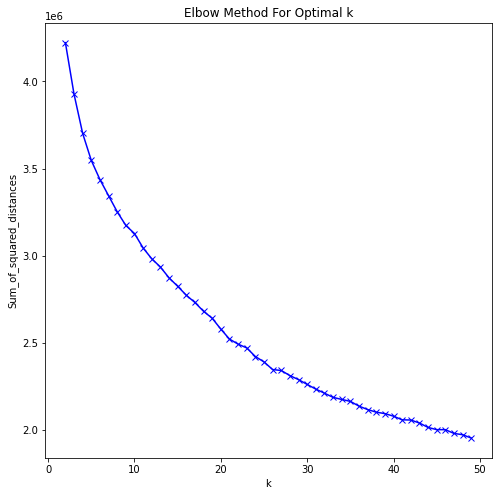

In [74]:
calculate_square(X_final)

Há uma dificuldade em encontrar o valor K, pois a quebra não está bem definida. Levantando duas hipóteses:

    - Pode ser que não exista um número claro de clusters que seja a melhor escolha para os seus dados. Isso pode acontecer quando os dados são altamente complexos ou heterogêneos, tornando difícil identificar agrupamentos claros.
    - Os clusters podem não ser bem definidos. Os clusters podem se sobrepor ou serem muito próximos uns dos outros, tornando difícil identificar uma separação clara entre eles. Isso pode acontecer quando os dados têm uma distribuição espacial complexa ou quando os clusters têm tamanhos muito diferentes.

Aparentemente o 5 tem uma pequena quebra no cotovelo

Ou seja, a hipótese 1 de que não existe um gosto bem definido e sim existe grupos com interesse misto e faça sentido ter um mix de tema, parece ser a mais correta. Portanto as pessoas tem gostos bem mistos

### Testando melhoria com PCA

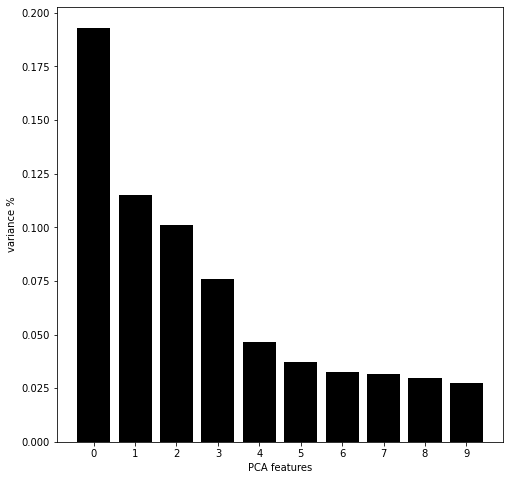

In [88]:

plt.rc('figure', figsize = (8,8))


pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_final)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

In [90]:
#Selecionando o 10 melhores componentes
pca.explained_variance_ratio_

array([0.19304794, 0.11520628, 0.10103556, 0.07589339, 0.04654799,
       0.03742005, 0.03268362, 0.03174196, 0.0296496 , 0.02760725])

In [93]:
0.19304794 + 0.11520628+ 0.10103556+ 0.07589339+0.04654799

0.5317311600000001

Baseado na visualização e na soma acima, podemos ver que os 5 primeiros componentes explicam em torno de 50% da variância dos dados




In [94]:
PCA_components.iloc[:,:5]

,0,1,2,3,4
0,-4.280699,-1.973966,-0.181924,-0.550646,0.519937
1,-1.832626,-0.477961,-1.062383,0.128407,0.022830
2,-1.424165,0.190149,-2.556139,0.090229,0.906152
3,1.525794,-1.920263,0.818197,-0.516205,-0.197464
4,-1.860051,0.607818,-1.295936,-0.871408,-0.174215
...,...,...,...,...,...
129505,1.542883,2.977976,3.072080,-1.024984,-0.302788
129506,-1.790867,-1.638525,1.594077,-2.187238,-0.263921
129507,1.370905,1.204516,2.042089,2.199293,0.275581
129508,-1.714363,-1.964737,2.313580,-0.331521,-0.703214


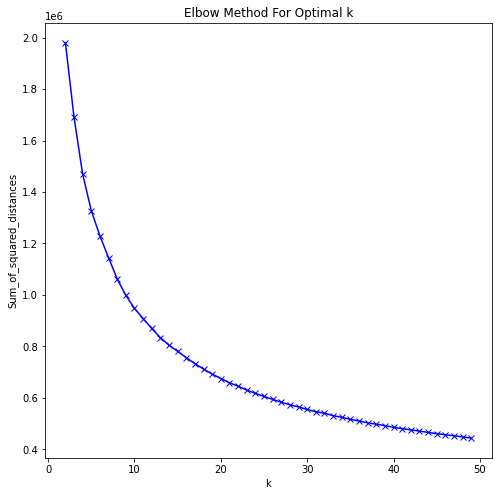

In [95]:
calculate_square(PCA_components.iloc[:,:5])

Também não está claro a quantidade K de clusters ideiais

<h4> 4.2 Teste 2 com variáveis</h4><a id="42"></a>

Foi desconsiderado as mesmas variáveis do Teste 1, porém foi incluído como entrada pro modelo o estado do usuário


### E se adicionarmos o estado em que elas vivem?

In [74]:
le = LabelEncoder()

In [75]:
df_limpo_filtro_idade['address_state_tratado'] = le.fit_transform(df_limpo_filtro_idade['address_state'])

In [76]:
df_limpo_filtro_idade

,userid,pageviews,sessoes,page_sessao,avg_tempo_sessao,perc_sessao_manha,perc_sessao_tarde,perc_sessao_noite,perc_sessao_madrugada,perc_sessao_mobile,perc_sessao_desktop,razao_sessao_g1_home,razao_sessao_ge_home,razao_sessao_gshow_home,retorno_semanal,retorno_mensal,clicks_total,perc_sessoes_click,perc_sessoes_click_video,perc_sessoes_clicou_ao_vivo,perc_sessoes_clicks_1_tema,perc_sessoes_clicks_2_temas,perc_sessoes_clicks_3_mais_temas,perc_sessoes_clicks_1_area,perc_sessoes_clicks_2_areas,perc_sessoes_clicks_3_mais_areas,perc_sessoes_click_sessao_jornalismo,perc_sessoes_click_sessao_esporte,perc_sessoes_click_sessao_entretenimento,perc_sessoes_click_sessao_receitas,perc_sessoes_click_sessao_techtudo,perc_sessoes_click_sessao_globoplay,perc_sessoes_click_sessao_valor,perc_sessoes_click_sessao_autoesporte,perc_sessoes_click_sessao_outros,avg_clicks_por_sessao,avg_clicks_temas_por_sessao,avg_clicks_areas_por_sessao,avg_areas_views_por_sessao,avg_temas_views_por_sessao,avg_views_por_sessao,address_state,idade,gender,address_state_tratado
1,G_60891,487,376,1.295213,28.751184,0.169492,0.277542,0.519068,0.033898,0.991525,0.008475,0.069149,0.702128,0.005319,4.416667,19.272727,75,0.188830,0.002660,0.000000,0.180851,0.005319,0.002660,0.183511,0.005319,0.000000,0.015957,0.061170,0.005319,0.000000,0.000000,0.0,0.0,0.0,0.002660,0.234683,0.234683,0.229624,3.390801,2.991759,16.942771,Distrito Federal,47,M,6
3,G_119135,226,136,1.661765,62.789542,0.251613,0.296774,0.412903,0.038710,0.890323,0.109677,0.279412,0.411765,0.051471,3.937500,10.500000,97,0.522059,0.000000,0.000000,0.448529,0.051471,0.022059,0.433824,0.058824,0.029412,0.367647,0.066176,0.117647,0.000000,0.000000,0.0,0.0,0.0,0.029412,0.637720,0.583101,0.592549,5.167181,3.778755,26.345499,Distrito Federal,37,M,6
4,G_29373,78,42,1.857143,68.514023,0.186047,0.255814,0.325581,0.232558,1.000000,0.000000,0.595238,0.023810,0.190476,1.705882,3.222222,41,0.500000,0.000000,0.000000,0.380952,0.119048,0.000000,0.357143,0.142857,0.000000,0.404762,0.047619,0.095238,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.018301,0.735621,0.645752,5.813399,4.082680,28.657843,São Paulo,34,F,27
5,G_141103,1387,660,2.101515,148.205085,0.269972,0.314050,0.325069,0.090909,0.760331,0.239669,0.651515,0.042424,0.025758,5.300000,19.272727,810,0.596970,0.072727,0.137143,0.378788,0.142424,0.075758,0.368182,0.162121,0.066667,0.468182,0.034848,0.051515,0.000000,0.027273,0.0,0.0,0.0,0.054545,1.154844,0.990214,0.885143,7.194294,5.182156,43.226269,Bahia,25,M,4
6,G_115811,93,82,1.134146,33.321868,0.362637,0.219780,0.318681,0.098901,0.989011,0.010989,0.426829,0.048780,0.109756,3.142857,5.500000,50,0.487805,0.000000,0.034483,0.426829,0.060976,0.000000,0.414634,0.073171,0.000000,0.329268,0.012195,0.146341,0.000000,0.012195,0.0,0.0,0.0,0.000000,0.518003,0.466592,0.471518,7.256068,4.812853,39.913211,São Paulo,26,F,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161751,G_60392,705,223,3.161435,503.141331,0.508264,0.462810,0.028926,0.000000,0.078512,0.921488,0.452915,0.121076,0.242152,4.608696,15.142857,241,0.475336,0.035874,0.032051,0.291480,0.094170,0.089686,0.286996,0.121076,0.067265,0.318386,0.107623,0.156951,0.000000,0.004484,0.0,0.0,0.0,0.026906,1.012079,0.768610,0.741890,10.174271,6.746496,71.111325,São Paulo,34,F,27
161752,G_32070,1019,614,1.659609,76.984843,0.294203,0.324638,0.331884,0.049275,0.872464,0.127536,0.084691,0.060261,0.009772,6.166667,23.125000,213,0.278502,0.052117,0.026627,0.239414,0.032573,0.006515,0.237785,0.032573,0.008143,0.148208,0.073290,0.019544,0.001629,0.006515,0.0,0.0,0.0,0.057003,0.386583,0.363407,0.370178,7.136021,4.642165,37.996724,São Paulo,39,M,27
161753,G_7242,1127,340,3.314706,422.013980,0.262857,0.548571,0.180000,0.008571,0.000000,1.000000,0.314706,0.550000,0.058824,3.820513,13.545455,460,0.623529,0.014706,0.031250,0.370588,0.152941,0.100000,0.373529,0.191176,0.05

In [77]:
x2 = df_limpo_filtro_idade.drop(['userid','gender','address_state', 'perc_sessoes_click', 'perc_sessoes_clicks_1_tema','perc_sessoes_clicks_2_temas','perc_sessoes_clicks_3_mais_temas'],axis=1)
x2.head()

,pageviews,sessoes,page_sessao,avg_tempo_sessao,perc_sessao_manha,perc_sessao_tarde,perc_sessao_noite,perc_sessao_madrugada,perc_sessao_mobile,perc_sessao_desktop,razao_sessao_g1_home,razao_sessao_ge_home,razao_sessao_gshow_home,retorno_semanal,retorno_mensal,clicks_total,perc_sessoes_click_video,perc_sessoes_clicou_ao_vivo,perc_sessoes_clicks_1_area,perc_sessoes_clicks_2_areas,perc_sessoes_clicks_3_mais_areas,perc_sessoes_click_sessao_jornalismo,perc_sessoes_click_sessao_esporte,perc_sessoes_click_sessao_entretenimento,perc_sessoes_click_sessao_receitas,perc_sessoes_click_sessao_techtudo,perc_sessoes_click_sessao_globoplay,perc_sessoes_click_sessao_valor,perc_sessoes_click_sessao_autoesporte,perc_sessoes_click_sessao_outros,avg_clicks_por_sessao,avg_clicks_temas_por_sessao,avg_clicks_areas_por_sessao,avg_areas_views_por_sessao,avg_temas_views_por_sessao,avg_views_por_sessao,idade,address_state_tratado
1,487,376,1.295213,28.751184,0.169492,0.277542,0.519068,0.033898,0.991525,0.008475,0.069149,0.702128,0.005319,4.416667,19.272727,75,0.002660,0.000000,0.183511,0.005319,0.000000,0.015957,0.061170,0.005319,0.0,0.000000,0.0,0.0,0.0,0.002660,0.234683,0.234683,0.229624,3.390801,2.991759,16.942771,47,6
3,226,136,1.661765,62.789542,0.251613,0.296774,0.412903,0.038710,0.890323,0.109677,0.279412,0.411765,0.051471,3.937500,10.500000,97,0.000000,0.000000,0.433824,0.058824,0.029412,0.367647,0.066176,0.117647,0.0,0.000000,0.0,0.0,0.0,0.029412,0.637720,0.583101,0.592549,5.167181,3.778755,26.345499,37,6
4,78,42,1.857143,68.514023,0.186047,0.255814,0.325581,0.232558,1.000000,0.000000,0.595238,0.023810,0.190476,1.705882,3.222222,41,0.000000,0.000000,0.357143,0.142857,0.000000,0.404762,0.047619,0.095238,0.0,0.000000,0.0,0.0,0.0,0.000000,1.018301,0.735621,0.645752,5.813399,4.082680,28.657843,34,27
5,1387,660,2.101515,148.205085,0.269972,0.314050,0.325069,0.090909,0.760331,0.239669,0.651515,0.042424,0.025758,5.300000,19.272727,810,0.072727,0.137143,0.368182,0.162121,0.066667,0.468182,0.034848,0.051515,0.0,0.027273,0.0,0.0,0.0,0.054545,1.154844,0.990214,0.885143,7.194294,5.182156,43.226269,25,4
6,93,82,1.134146,33.321868,0.362637,0.219780,0.318681,0.098901,0.989011,0.010989,0.426829,0.048780,0.109756,3.142857,5.500000,50,0.000000,0.034483,0.414634,0.073171,0.000000,0.329268,0.012195,0.146341,0.0,0.012195,0.0,0.0,0.0,0.000000,0.518003,0.466592,0.471518,7.256068,4.812853,39.913211,26,27


In [78]:
scaler = StandardScaler()
x_scaled2 = scaler.fit_transform(x2)
X_final2 = pd.DataFrame(x_scaled2, columns=x2.columns)

In [79]:
X_final2.head()

,pageviews,sessoes,page_sessao,avg_tempo_sessao,perc_sessao_manha,perc_sessao_tarde,perc_sessao_noite,perc_sessao_madrugada,perc_sessao_mobile,perc_sessao_desktop,razao_sessao_g1_home,razao_sessao_ge_home,razao_sessao_gshow_home,retorno_semanal,retorno_mensal,clicks_total,perc_sessoes_click_video,perc_sessoes_clicou_ao_vivo,perc_sessoes_clicks_1_area,perc_sessoes_clicks_2_areas,perc_sessoes_clicks_3_mais_areas,perc_sessoes_click_sessao_jornalismo,perc_sessoes_click_sessao_esporte,perc_sessoes_click_sessao_entretenimento,perc_sessoes_click_sessao_receitas,perc_sessoes_click_sessao_techtudo,perc_sessoes_click_sessao_globoplay,perc_sessoes_click_sessao_valor,perc_sessoes_click_sessao_autoesporte,perc_sessoes_click_sessao_outros,avg_clicks_por_sessao,avg_clicks_temas_por_sessao,avg_clicks_areas_por_sessao,avg_areas_views_por_sessao,avg_temas_views_por_sessao,avg_views_por_sessao,idade,address_state_tratado
0,-0.111425,0.255637,-0.423755,-0.400422,-0.865920,-0.421641,1.335765,-0.493895,0.886682,-0.876914,-0.508269,-0.024577,-0.544261,0.239504,0.890012,-0.510646,-0.568665,-0.675109,-1.393164,-1.327821,-0.676007,-1.365101,-0.681847,-1.069676,-0.177952,-0.365719,-0.146674,-0.08247,-0.057173,-0.527417,-1.140386,-1.362277,-1.386182,-1.608528,-1.504620,-1.672665,0.554506,-1.629213
1,-0.419738,-0.473872,-0.190688,-0.285521,-0.248600,-0.268353,0.655447,-0.435011,0.649539,-0.639239,-0.177848,-0.219550,-0.417502,-0.100560,-0.432950,-0.456946,-0.632029,-0.675109,0.244053,-0.680906,-0.234810,0.734793,-0.648432,-0.396174,-0.177952,-0.365719,-0.146674,-0.08247,-0.057173,0.086241,-0.549880,-0.560923,-0.503364,-0.721202,-0.815074,-1.040292,-0.307499,-1.629213
2,-0.594566,-0.759596,-0.066460,-0.266198,-0.741473,-0.594829,0.095877,1.937403,0.906540,-0.896816,0.318462,-0.480055,-0.035711,-1.684335,-1.530467,-0.593636,-0.632029,-0.675109,-0.257491,0.335135,-0.676007,0.956401,-0.772297,-0.530535,-0.177952,-0.365719,-0.146674,-0.08247,-0.057173,-0.588423,0.007726,-0.210132,-0.373948,-0.398407,-0.548782,-0.884778,-0.566101,1.039948
3,0.951721,1.118890,0.088921,0.002809,-0.110588,-0.130659,0.092593,0.203832,0.344936,-0.333953,0.406899,-0.467555,-0.488125,0.866404,0.890012,1.283411,1.100687,1.899284,-0.185288,0.568054,0.324040,1.335074,-0.857537,-0.792691,-0.177952,1.627128,-0.146674,-0.08247,-0.057173,0.662773,0.207781,0.375426,0.208373,0.291369,0.414552,0.095010,-1.341905,-1.883419
4,-0.576847,-0.638012,-0.526167,-0.384993,0.585990,-0.882037,0.051660,0.301642,0.880790,-0.871009,0.053813,-0.463287,-0.257416,-0.664516,-1.186970,-0.571668,-0.632029,-0.027812,0.118542,-0.507436,-0.676007,0.505638,-1.008741,-0.224126,-0.177952,0.525391,-0.146674,-0.08247,-0.057173,-0.588423,-0.725282,-0.828892,-0.797772,0.322226,0.090978,-0.127807,-1.255705,1.039948


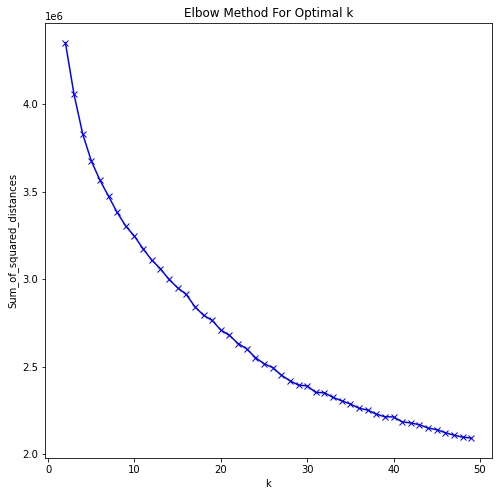

In [85]:
calculate_square(X_final2)

### Testando melhoria com PCA

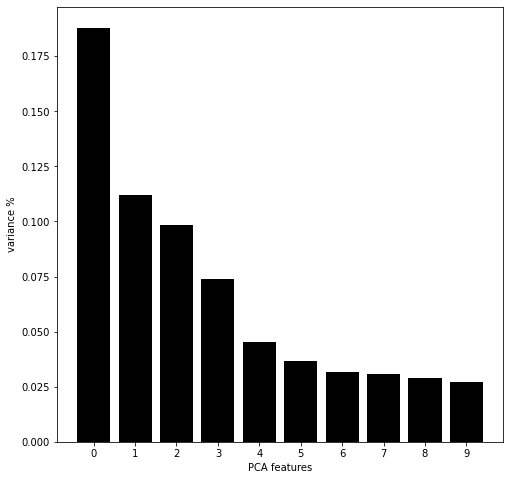

In [96]:
plt.rc('figure', figsize = (8,8))


pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_final2)

features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

PCA_components = pd.DataFrame(principalComponents)

In [97]:
pca.explained_variance_ratio_

array([0.18797139, 0.11217459, 0.09837695, 0.07389854, 0.04530991,
       0.03647484, 0.03172227, 0.03093546, 0.0288719 , 0.02697056])

In [99]:
0.18797139 + 0.11217459+0.09837695+0.07389854 + 0.04530991

0.51773138

Baseado na visualização e na soma acima, podemos ver que os 5 primeiros componentes explicam em torno de 50% da variância dos dados


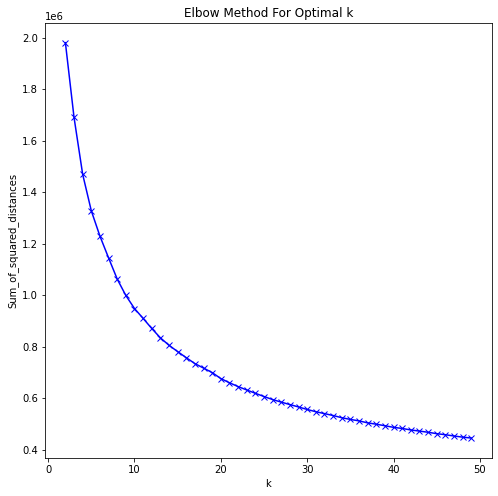

In [100]:
calculate_square(PCA_components.iloc[:,:5])

<h4> 4.3 Teste 3 com variáveis  </h4><a id="43"></a>

Vou tentar mais um teste dessa vez considerando o percentual de clicks em 1 2 e 3 temas para ver se essas variáveis ajudam na identificação dos clusters

Variáveis desconsideradas:  'userid','gender','address_state', 'perc_sessoes_click'


In [80]:
x3 = df_limpo_filtro_idade.drop(['userid','gender','address_state', 'perc_sessoes_click'],axis=1)
x3.head()

,pageviews,sessoes,page_sessao,avg_tempo_sessao,perc_sessao_manha,perc_sessao_tarde,perc_sessao_noite,perc_sessao_madrugada,perc_sessao_mobile,perc_sessao_desktop,razao_sessao_g1_home,razao_sessao_ge_home,razao_sessao_gshow_home,retorno_semanal,retorno_mensal,clicks_total,perc_sessoes_click_video,perc_sessoes_clicou_ao_vivo,perc_sessoes_clicks_1_tema,perc_sessoes_clicks_2_temas,perc_sessoes_clicks_3_mais_temas,perc_sessoes_clicks_1_area,perc_sessoes_clicks_2_areas,perc_sessoes_clicks_3_mais_areas,perc_sessoes_click_sessao_jornalismo,perc_sessoes_click_sessao_esporte,perc_sessoes_click_sessao_entretenimento,perc_sessoes_click_sessao_receitas,perc_sessoes_click_sessao_techtudo,perc_sessoes_click_sessao_globoplay,perc_sessoes_click_sessao_valor,perc_sessoes_click_sessao_autoesporte,perc_sessoes_click_sessao_outros,avg_clicks_por_sessao,avg_clicks_temas_por_sessao,avg_clicks_areas_por_sessao,avg_areas_views_por_sessao,avg_temas_views_por_sessao,avg_views_por_sessao,idade,address_state_tratado
1,487,376,1.295213,28.751184,0.169492,0.277542,0.519068,0.033898,0.991525,0.008475,0.069149,0.702128,0.005319,4.416667,19.272727,75,0.002660,0.000000,0.180851,0.005319,0.002660,0.183511,0.005319,0.000000,0.015957,0.061170,0.005319,0.0,0.000000,0.0,0.0,0.0,0.002660,0.234683,0.234683,0.229624,3.390801,2.991759,16.942771,47,6
3,226,136,1.661765,62.789542,0.251613,0.296774,0.412903,0.038710,0.890323,0.109677,0.279412,0.411765,0.051471,3.937500,10.500000,97,0.000000,0.000000,0.448529,0.051471,0.022059,0.433824,0.058824,0.029412,0.367647,0.066176,0.117647,0.0,0.000000,0.0,0.0,0.0,0.029412,0.637720,0.583101,0.592549,5.167181,3.778755,26.345499,37,6
4,78,42,1.857143,68.514023,0.186047,0.255814,0.325581,0.232558,1.000000,0.000000,0.595238,0.023810,0.190476,1.705882,3.222222,41,0.000000,0.000000,0.380952,0.119048,0.000000,0.357143,0.142857,0.000000,0.404762,0.047619,0.095238,0.0,0.000000,0.0,0.0,0.0,0.000000,1.018301,0.735621,0.645752,5.813399,4.082680,28.657843,34,27
5,1387,660,2.101515,148.205085,0.269972,0.314050,0.325069,0.090909,0.760331,0.239669,0.651515,0.042424,0.025758,5.300000,19.272727,810,0.072727,0.137143,0.378788,0.142424,0.075758,0.368182,0.162121,0.066667,0.468182,0.034848,0.051515,0.0,0.027273,0.0,0.0,0.0,0.054545,1.154844,0.990214,0.885143,7.194294,5.182156,43.226269,25,4
6,93,82,1.134146,33.321868,0.362637,0.219780,0.318681,0.098901,0.989011,0.010989,0.426829,0.048780,0.109756,3.142857,5.500000,50,0.000000,0.034483,0.426829,0.060976,0.000000,0.414634,0.073171,0.000000,0.329268,0.012195,0.146341,0.0,0.012195,0.0,0.0,0.0,0.000000,0.518003,0.466592,0.471518,7.256068,4.812853,39.913211,26,27


In [81]:
scaler = StandardScaler()
x_scaled3 = scaler.fit_transform(x3)
X_final3 = pd.DataFrame(x_scaled3, columns=x3.columns)

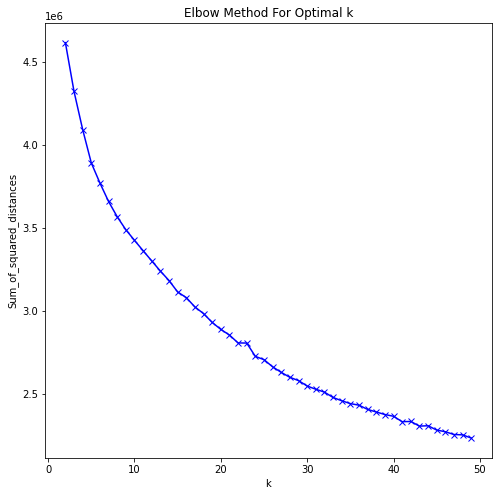

In [105]:
calculate_square(X_final3)

<h4> 4.4 Teste 4 com variáveis</h4><a id="44"></a>

Foi desconsiderado as mesmas variáveis do Teste 3, além da remoção das variáveis com os nomes dos temas (removendo os nomes dos temas para evitar redundância)


In [82]:
x4 = df_limpo_filtro_idade.drop(['userid','gender','address_state', 'perc_sessoes_click','perc_sessoes_click_sessao_jornalismo','perc_sessoes_click_sessao_esporte',
                                'perc_sessoes_click_sessao_entretenimento','perc_sessoes_click_sessao_receitas','perc_sessoes_click_sessao_techtudo',
                                'perc_sessoes_click_sessao_globoplay','perc_sessoes_click_sessao_valor','perc_sessoes_click_sessao_autoesporte','perc_sessoes_click_sessao_outros'],axis=1)
x4.head()

,pageviews,sessoes,page_sessao,avg_tempo_sessao,perc_sessao_manha,perc_sessao_tarde,perc_sessao_noite,perc_sessao_madrugada,perc_sessao_mobile,perc_sessao_desktop,razao_sessao_g1_home,razao_sessao_ge_home,razao_sessao_gshow_home,retorno_semanal,retorno_mensal,clicks_total,perc_sessoes_click_video,perc_sessoes_clicou_ao_vivo,perc_sessoes_clicks_1_tema,perc_sessoes_clicks_2_temas,perc_sessoes_clicks_3_mais_temas,perc_sessoes_clicks_1_area,perc_sessoes_clicks_2_areas,perc_sessoes_clicks_3_mais_areas,avg_clicks_por_sessao,avg_clicks_temas_por_sessao,avg_clicks_areas_por_sessao,avg_areas_views_por_sessao,avg_temas_views_por_sessao,avg_views_por_sessao,idade,address_state_tratado
1,487,376,1.295213,28.751184,0.169492,0.277542,0.519068,0.033898,0.991525,0.008475,0.069149,0.702128,0.005319,4.416667,19.272727,75,0.002660,0.000000,0.180851,0.005319,0.002660,0.183511,0.005319,0.000000,0.234683,0.234683,0.229624,3.390801,2.991759,16.942771,47,6
3,226,136,1.661765,62.789542,0.251613,0.296774,0.412903,0.038710,0.890323,0.109677,0.279412,0.411765,0.051471,3.937500,10.500000,97,0.000000,0.000000,0.448529,0.051471,0.022059,0.433824,0.058824,0.029412,0.637720,0.583101,0.592549,5.167181,3.778755,26.345499,37,6
4,78,42,1.857143,68.514023,0.186047,0.255814,0.325581,0.232558,1.000000,0.000000,0.595238,0.023810,0.190476,1.705882,3.222222,41,0.000000,0.000000,0.380952,0.119048,0.000000,0.357143,0.142857,0.000000,1.018301,0.735621,0.645752,5.813399,4.082680,28.657843,34,27
5,1387,660,2.101515,148.205085,0.269972,0.314050,0.325069,0.090909,0.760331,0.239669,0.651515,0.042424,0.025758,5.300000,19.272727,810,0.072727,0.137143,0.378788,0.142424,0.075758,0.368182,0.162121,0.066667,1.154844,0.990214,0.885143,7.194294,5.182156,43.226269,25,4
6,93,82,1.134146,33.321868,0.362637,0.219780,0.318681,0.098901,0.989011,0.010989,0.426829,0.048780,0.109756,3.142857,5.500000,50,0.000000,0.034483,0.426829,0.060976,0.000000,0.414634,0.073171,0.000000,0.518003,0.466592,0.471518,7.256068,4.812853,39.913211,26,27


In [83]:
scaler = StandardScaler()
x_scaled4 = scaler.fit_transform(x4)
X_final4 = pd.DataFrame(x_scaled4, columns=x4.columns)

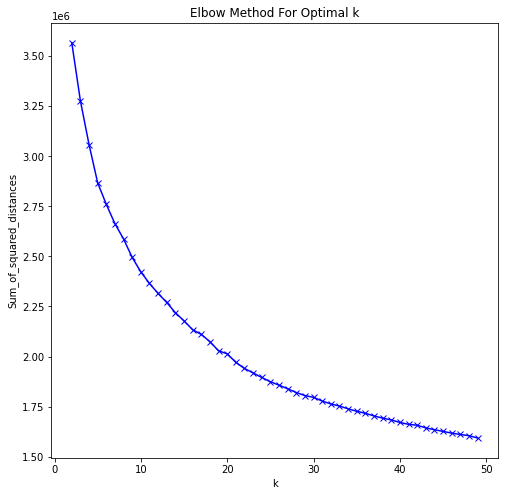

In [109]:
calculate_square(X_final4)

<h4> 4.5 Conclusão das hipóteses</h4><a id="45"></a>

Com base nos testes que foram feito para segmentação de usuários, não foi possível encontrar o melhor valor k (quantidade de clusters ideias). Confirmando que a hipótese alternativa aparenta ser a correta, ou seja, temos perfis mistos dentro da base de dados. 

<div style="text-align:right;">
Laura Damacenode Almeida
    <br>
    Março, 2024.